<div style="display: flex; align-items: center; justify-content: left; padding: 0px;">
    <div class="logo-container" style="flex:0.13;height:100%;">
        <img src="https://raw.githubusercontent.com/andikaaa18/Tripleten_datascience_project/main/Assets/logo_tripleten.png" alt="Logo" style="max-height: 155px; width: auto; filter:invert(0%);">
    </div>
    <div class="title-container" style="flex:0.85;height:75%;text-align: left">
        <div style="margin: 0px 0px 0px 0px; font-size: 40px; font-family:Trebuchet MS; font-weight:bold; line-height:40px;">Tripleten Indonesia Project</div>
        <div style="margin: 0px 0px 0px 0px; font-size: 30px; font-family:Trebuchet MS;">&mdash; Sprint 14 : Machine Learning Untuk Teks</div>
    </div>
</div>

<hr style="width:95%;height:2px;background-color:black;" align="left">

<div style="font-family:Trebuchet MS; font-weight:bold; font-size:35px; text-align:left; line-height:40px">
Analisis Sentimen Berbasis BERT untuk Ulasan Film IMDb
</div>
<div style="font-family:Trebuchet MS; font-weight:regular; font-size:20px; text-align:left; ">
&mdash; Mengungkap <i>Insight</i> Sentimental Para Penggemar Film</i>
</div>

# **A. Pendahuluan**

## 1) Deskripsi Proyek

<h4 style="font-family:Trebuchet MS; font-weight:bold; padding-bottom:0px">Sebuah komunitas penggemar film klasik ingin mengembangkan model prediktif untuk ulasan film.</h4>

<div style="margin-left:2%; width:95%; text-align:justify">

Saat ini kita bekerja untuk **Film Junky Union**. **Film Junky Union** merupakan sebuah komunitas baru bagi penggemar film klasik. Saat ini, komunitas ingin mengembangkan sistem untuk memfilter dan mengkategorikan ulasan film. Dengan sistem tersebut diharapkan dapat mendeteksi ulasan negatif secara otomatis. Dataset ulasan film IMDb yang telah diberi label polaritas (negatif/positif) akan digunakan untuk membangun sistem tersebut. Adapun *minimum requirement* yang harus dipenuhi sistem, yaitu mampu mengklasifikasikan ulasan positif dan negatif dengan skor F1 minimum sebesar 0,85.
</div>

## 2) Tujuan dan Alur Proses

<h3 style="font-family:Trebuchet MS; font-weight:bold">Tujuan</h3>
<div style="margin-left:2%; width:95%; text-align:justify">

Berikut di bawah ini merupakan tujuan yang ingin dicapai pada proyek ini:
1. Dapat mengolah informasi dari dataset ulasan film IMDb yang akan digunakan pada proyek ini.
2. Mampu membuat model prediktif yang dapat memprediksi sentimen ulasan film (negatif/positif) dengan F1 score minimal sebesar 0,85 ketika memprediksi *testing dataset*.
</div>

<h3 style="font-family:Trebuchet MS; font-weight:bold">Alur Proyek</h3>
<div style="margin-left:2%; width:95%;text-align:justify">

Adapun proses yang akan dilakukan dalam proses analis untuk proyek ini terdiri dari beberapa langkah utama, yaitu:
1. **Ikhtisar Data.** <div> Pada bagian ini, data yang telah diimpor akan dipahami setiap parameter data serta sejumlah catatan dokumentasi terkait dataset.</div>        
2. **Mempersiapkan Data.** <div> Pada bagian ini, data yang telah diimpor akan dilakukan proses eksplorasi untuk melihat berbagai permasalahan pada data kemudian dilanjutkan dengan perbaikan data. Apabila diperlukan, reduksi dan pengayaan data akan dilakukan untuk membuang informasi yang tidak relevan dan memperkaya informasi pada dataset. Hasil akhir dari proses ini yaitu dataset yang siap untuk dilakukan proses analisis.</div>        
2. **Analisa Data Eksploratif.** <div> Pada bagian ini, data yang telah dipersiapkan akan diolah untuk memperoleh informasi penting dengan melakukan sejumlah perhitungan statistik dan visualisasi data.</div>
3. **Membangun Model *Machine-learning*.** <div> Pada bagian ini akan dilakukan sejumlah proses, diantaranya: *feature engineering*, membangun *baseline model*, melakukan optimasi model, dan diakhiri dengan evaluasi model menggunakan *testing dataset* untuk memutuskan model terbaik.
</div>

</div>

# **B. Memuat Data**

* Memuat sejumlah *library* dan data yang dibutuhkan.

In [44]:
# library for data processing
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import torch

# library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# library for building models
import transformers
from sklearn. model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

# library model evaluation
from sklearn.metrics import f1_score, accuracy_score, roc_curve, roc_auc_score, precision_recall_curve, average_precision_score

# other
from tqdm.auto import tqdm
import os

pd.options.mode.chained_assignment = None

In [2]:
# setting grafik untuk visualisasi data
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-v0_8')

In [3]:
# memuat dataset
try:
    data = pd.read_csv("../datasets/imdb_reviews.tsv", sep="\t")
    
except:
    data = pd.read_csv("/datasets/imdb_reviews.tsv", sep="\t")

# **C. Ikhtisar Data**

Berikut di bawah ini ditampilkan 10 baris data pada dataset yang akan dianalisis.

In [4]:
print(f"Ukuran dataset: {data.shape}")
data.head(10)

Ukuran dataset: (47331, 17)


,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
0,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218.0,The pakage implies that Warren Beatty and Gold...,1,neg,0,train,8335
1,tt0068152,movie,$,$,1971,\N,121,0,"Comedy,Crime,Drama",6.3,2218.0,How the hell did they get this made?! Presenti...,1,neg,0,train,8336
2,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,There is no real story the film seems more lik...,3,neg,0,test,2489
3,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,Um .... a serious film about troubled teens in...,7,pos,1,test,9280
4,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,I'm totally agree with GarryJohal from Singapo...,9,pos,1,test,9281
5,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,This is the first movie I've seen from Singapo...,9,pos,1,test,9282
6,tt0313150,short,'15','15',2002,\N,25,0,"Comedy,Drama,Short",6.3,184.0,Yes non-Singaporean's can't see what's the big...,9,pos,1,test,9283
7,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240.0,This true story of Carlson's Raiders is more o...,2,neg,0,train,9903
8,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240.0,Should have been titled 'Balderdash!' Little i...,2,neg,0,train,9905
9,tt0035958,movie,'Gung Ho!': The Story of Carlson's Makin Islan...,'Gung Ho!': The Story of Carlson's Makin Islan...,1943,\N,88,0,"Drama,History,War",6.1,1240.0,The movie 'Gung Ho!': The Story of Carlson's M...,4,neg,0,train,9904


Berikut di bawah ini merupakan deskripsi dari masing-masing kolom berdasarkan dokumentasi pada dataset.

* `tconst` &mdash; ID unik (alfanumerik) untuk setiap film dalam basis data IMDb.
* `title_type` &mdash; Jenis/format judul film (misalnya *movie*, *short movie*, *TV series*, *TV episode*, *video*, dll).
* `primary_title` &mdash; Judul film populer yang digunakan para pembuat film pada materi promosi saat perilisannya.
* `original_title` &mdash; Judul asli, dalam bahasa aslinya.
* `start_year` &mdash; Tahun rilis suatu judul film. Dalam kasus *TV series*, ini adalah tahun awal serial tersebut.
* `end_year` &mdash; Tahun akhir rilis film untuk *TV series*. Untuk jenis film lainnya akan memiliki nilai '\N'.
* `runtime_minutes` &mdash; Durasi film dalam menit. Untuk film *TV series*, nilai pada kolom ini dapat berupa '\N'.
* `is_adult` &mdash; Penanda apakah film tersebut untuk dewasa atau tidak.
* `genres` &mdash; Genre film. Mencakup hingga tiga genre yang terkait dengan judul film.
* `average_rating` &mdash; Rata-rata skor film oleh pengguna IMDb (skala 1 hingga 10).
* `votes` &mdash; Jumlah suara yang diberikan oleh pengguna IMDb untuk film tersebut.
* `review` &mdash; Teks ulasan yang diberikan oleh setiap pengguna IMDb.
* `rating` &mdash; Skor film yang diberikan oleh setiap individu pengguna IMDb (skala 1 hingga 10).
* `sp` &mdash; Sentimen ulasan film yang diberikan oleh setiap pengguna IMDb. Bernilai 'neg' untuk negatif atau 'pos' untuk positif.
* `pos` &mdash; Target, '0' untuk ulasan negatif dan '1' untuk ulasan positif.
* `ds_part` &mdash; 'train'/'test' untuk bagian train/test dataset.
* `idx`

# **D. Mempersiapkan Data**

## 1) Eksplorasi Data

Berikut di bawah ini merupakan informasi umum dataset.

In [5]:
# informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  float64
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: float64(2

Dari hasil di atas, berikut informasi yang diperoleh.

* Dataset memiliki sebanyak 47331 baris dan 7 kolom.
* Dataset mengandung *missing value* pada kolom `'average_rating'` dan `'votes'`.

### **Nilai Hilang Pada Data**

In [6]:
# Jumlah data yang hilang pada masing-masing kolom
print("Jumlah data yang hilang pada masing-masing kolom :")
data.isna().sum().loc[lambda x: x>0]

Jumlah data yang hilang pada masing-masing kolom :


average_rating    2
votes             2
dtype: int64

In [7]:
# menampilkan baris data yang memiliki missing value
data[data.isna().any(axis=1)]

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
22280,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,NaN,"This is a truly great film, with excellent dir...",9,pos,1,test,3231
22281,tt0192317,movie,Mila Ass Painting,Mila Ass Painting,1998,\N,\N,0,\N,NaN,NaN,"A film is beyond all expectations, an excellen...",10,pos,1,test,3232


Terdapat dua kolom yang memiliki *missing value*, yakni `'average_rating'` dan `'votes`'. Pada masing-masing kolom, terdapat sebanyak 2 baris data yang mengandung *missing value*. Dari hasil penelusuran ditemukan bahwa data dengan *missing value* berasal dari film **Mila Ass Painting** dengan ID tt0192317.

Dalam pembuatan model, keberadaan *missing value* pada kedua kolom bukan sebuah masalah, karena kedua kolom tidak terlibat dalam pembuatan model. **Adapun untuk proses analisis data, kedua baris data harus dikeluarkan dahulu apabila ingin dilakukan analisa**.

### **Duplikasi Pada Data**

In [8]:
# jumlah data duplikat
print(f"jumlah data duplikat : {data[['tconst', 'review']].duplicated().sum()}")

jumlah data duplikat : 89


Terdapat sebanyak 89 data duplikat. Data-data tersebut memiliki isi ulasan yang identik untuk film yang sama pada baris data yang lain. **Oleh karena itu, data-data duplikat tersebut akan dibuang dari dataset**.

### **Noise Pada Teks Review**

Pada kolom `'review'` berisi serangkaian ulasan untuk sebuah film. Ulasan tersebut diinput oleh pengguna dan dapat berisi berbagai macam karakter, seperti alfanumerik, tanda baca, *hashtag*, *mentions*, URL, dan emoji. Untuk sejumlah metode vektorisasi teks, keberadaan *stopwords*, emoji, dan sebagainya dapat mengganggu proses vektorisasi teks. Akan tetapi, pada model BERT, *noise* tersebut dapat diatasi oleh BERT.

Pada proyek ini, kita akan menggunakan model BERT untuk *word embedding* sehingga pembersihan *noise* tidak perlu dilakukan untuk vektorisasi teks. Akan tetapi, pada tahap EDA, kita akan melakukan analisa pada kolom tersebut sehingga kita perlu membuang *noise* pada teks. 

In [9]:
# memeriksa jumlah data yang memasukkan URL di dalam ulasan
url_pat = 'https?://\S+|www.\S+'
print(f"Jumlah data yang memiliki ulasan dengan URL: {len(data[data['review'].str.contains(url_pat, regex=True)])} data")

Jumlah data yang memiliki ulasan dengan URL: 207 data


In [10]:
# memeriksa jumlah data yang menggunakan hashtag di dalam ulasan
hashtag_pat = '#\S+'
print(f"Jumlah data yang memiliki ulasan dengan hashtag: {len(data[data['review'].str.contains(hashtag_pat, regex=True)])} data")

Jumlah data yang memiliki ulasan dengan hashtag: 275 data


In [11]:
# memeriksa jumlah data yang melakukan mentions di dalam ulasan'
mentions_pat = '@\S+'
print(f"Jumlah data yang melakukan mentions di dalam ulasan: {len(data[data['review'].str.contains(mentions_pat, regex=True)])}")

Jumlah data yang melakukan mentions di dalam ulasan: 118


In [12]:
# memeriksa jumlah data yang menggunakan emoji di dalam ulasan
emojis_pat = ("["
              u"\U0001F600-\U0001F64F"  # emoticons
              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
              u"\U0001F680-\U0001F6FF"  # transport & map symbols
              u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
              u"\U00002702-\U000027B0"  # others
              u"\U000024C2-\U0001F251"  # others
              "]+")
print(f"Jumlah data yang menggunakan emoji di dalam ulasan: {len(data[data['review'].str.contains(emojis_pat, regex=True)])}")

Jumlah data yang menggunakan emoji di dalam ulasan: 4


In [13]:
# memeriksa jumlah data yang menggunakan simbol/tanda baca
punct_pat = '[' + string.punctuation + ']+'
print(f"Jumlah data yang menggunakan simbol di dalam ulasan: {len(data[data['review'].str.contains(punct_pat, regex=True)])}")

Jumlah data yang menggunakan simbol di dalam ulasan: 47326


Dari 47331 data yang terdapat di dalam dataset, jumlah data dengan *noise* yang telah disebut di atas yaitu sebagai berikut:
* Terdapat sebanyak 207 data ulasan yang mengandung URL.
* Terdapat sebanyak 275 data ulasan yang menggunakan *hashtag*.
* Terdapat sebanyak 118 data ulasan yang melakukan *mention*.
* Terdapat sebanyak 4 data ulasan yang menggunakan emoji.
* Terdapat sebanyak 47326 data ulasan yang menggunakan simbol/tanda baca.



### **Kesimpulan**

Dari hasil eksplorasi yang telah dilakukan, ditemukan sejumlah masalah pada data. Berikut merupakan rangkuman masalah dan tindakan yang harus dilakukan pada tahap selanjutnya.

1. Keberadaan *missing value* pada kolom `'average_rating'` dan `'votes'` bukan sebuah masalah dalam proses pembuatan model prediktif. Hanya saja, pada proses analisis data, *missing value* harus dikeluarkan terlebih dahulu.
2. Terdapat sejumlah data duplikat di dalam dataset. Data duplikat harus dikeluarkan sebelum melakukan analisis data dan membangun model prediktif.
3. Terdapat *noise* pada sejumlah ulasan di dalam dataset. Akan tetapi *noise* tidak akan mengganggu proses *embedding* dikarenakan pada proyek ini menggunakan BERT. Perlu dilakukan penambahan kolom baru yang berisi teks ulasan yang bebas *noise* untuk kebutuhan analisis data.

## 2) Memperbaiki Data

Berdasarkan kesimpulan sebelumnya, perbaikan yang perlu dilakukan yaitu mengeluarkan data duplikat dari dataset. Adapun terkait data *missing value*, data-data tersebut akan kita pertahankan dan dibiarkan begitu saja.

In [14]:
# menangani data duplikat
new_df = data.drop_duplicates(subset=['tconst', 'review'])

print(f"jumlah data duplikat : {new_df[['tconst', 'review']].duplicated().sum()}")

jumlah data duplikat : 0


## 3) Pengayaan Data

Dari kesimpulan pada proses eksplorasi, kita perlu melakukan penambahan kolom baru yang berisi teks ulasan yang bebas *noise* untuk kebutuhan analisis. Berikut di bawah ini merupakan *function* yang dapat melakukan *pre-processing* data teks tersebut.

In [15]:
def remove_urls(text):
    url_pat = 'https?://\S+|www.\S+'
    return re.sub(url_pat, '', text)

def remove_hashtags(text):
    hashtag_pat = '#\S+'
    return re.sub(hashtag_pat, '', text)

def remove_mentions(text):
    mentions_pat = '@\S+'
    return re.sub(mentions_pat, '', text)

def remove_emojis(text):
    emojis_pat = ("["
                  u"\U0001F600-\U0001F64F"  # emoticons
                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                  u"\U00002702-\U000027B0"  # others
                  u"\U000024C2-\U0001F251"  # others
                  "]+")
    return re.sub(emojis_pat, '', text)
 
def remove_symbols(text):
    punct_pat = '[' + string.punctuation + ']+'
    return re.sub(punct_pat, '', text)

def remove_stopwords(text):
    stopwords_eng = stopwords.words('english')
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stopwords_eng]
    filtered_text = ' '.join(filtered_words)
    return filtered_text
    
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    words = text.lower().split()
    lemma_words = [lemmatizer.lemmatize(word) for word in words]
    lemma_text = ' '.join(lemma_words)
    return lemma_text
    
def preprocess_sentence(text):
    text = remove_urls(text)
    text = remove_hashtags(text)
    text = remove_mentions(text)
    text = remove_emojis(text)
    text = remove_symbols(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    return text
    
text = ("Hey @user, your tutorial video at https://youtube.com/user_name is amazing! 😎 "
        "My Children and I love it. "
        "#YoutubeAcademy")
print(preprocess_sentence(text))

hey tutorial video amazing child love


Berikut di bawah ini, kita akan menambahkan kolom baru untuk teks yang sudah di *pre-processing*. Teks pada kolom tersebut harus bersih dari URL, emoji, *stopwords* dan segala *noise* lainnya. Teks pada kolom tersebut juga perlu dilakukan lematisasi.

In [16]:
# pre-processing teks
new_df['prep_review'] = data['review'].apply(preprocess_sentence)

print(new_df['review'].head())
print()
print(new_df['prep_review'].head())

0    The pakage implies that Warren Beatty and Gold...
1    How the hell did they get this made?! Presenti...
2    There is no real story the film seems more lik...
3    Um .... a serious film about troubled teens in...
4    I'm totally agree with GarryJohal from Singapo...
Name: review, dtype: object

0    pakage implies warren beatty goldie hawn pulli...
1    hell get made presenting caper comedy misbegot...
2    real story film seems like fly wall dramadocum...
3    um serious film troubled teen singapore countr...
4    im totally agree garryjohal singapore comment ...
Name: prep_review, dtype: object


## 4) Kesimpulan

Saat ini, data sudah siap dan dapat digunakan pada tahap selanjutnya. Berikut merupakan sejumlah proses yang telah dilakukan:
1. Membuang data-data duplikat.
2. Menambahkan kolom baru yang bernama `'prep_review'`. Kolom ini berisi data ulasan yang sudah dibersihkan dari *noise*, *stopwords* dan telah melewati proses lematisasi.

# **E. Analisa Data Eksploratif (EDA)**

## 1) Bagaimana Pertumbuhan Industri Film Tahun ke Tahun?

Berikut di bawah ini merupakan *bar plot* yang  menunjukkan jumlah film yang dirilis setiap tahun.

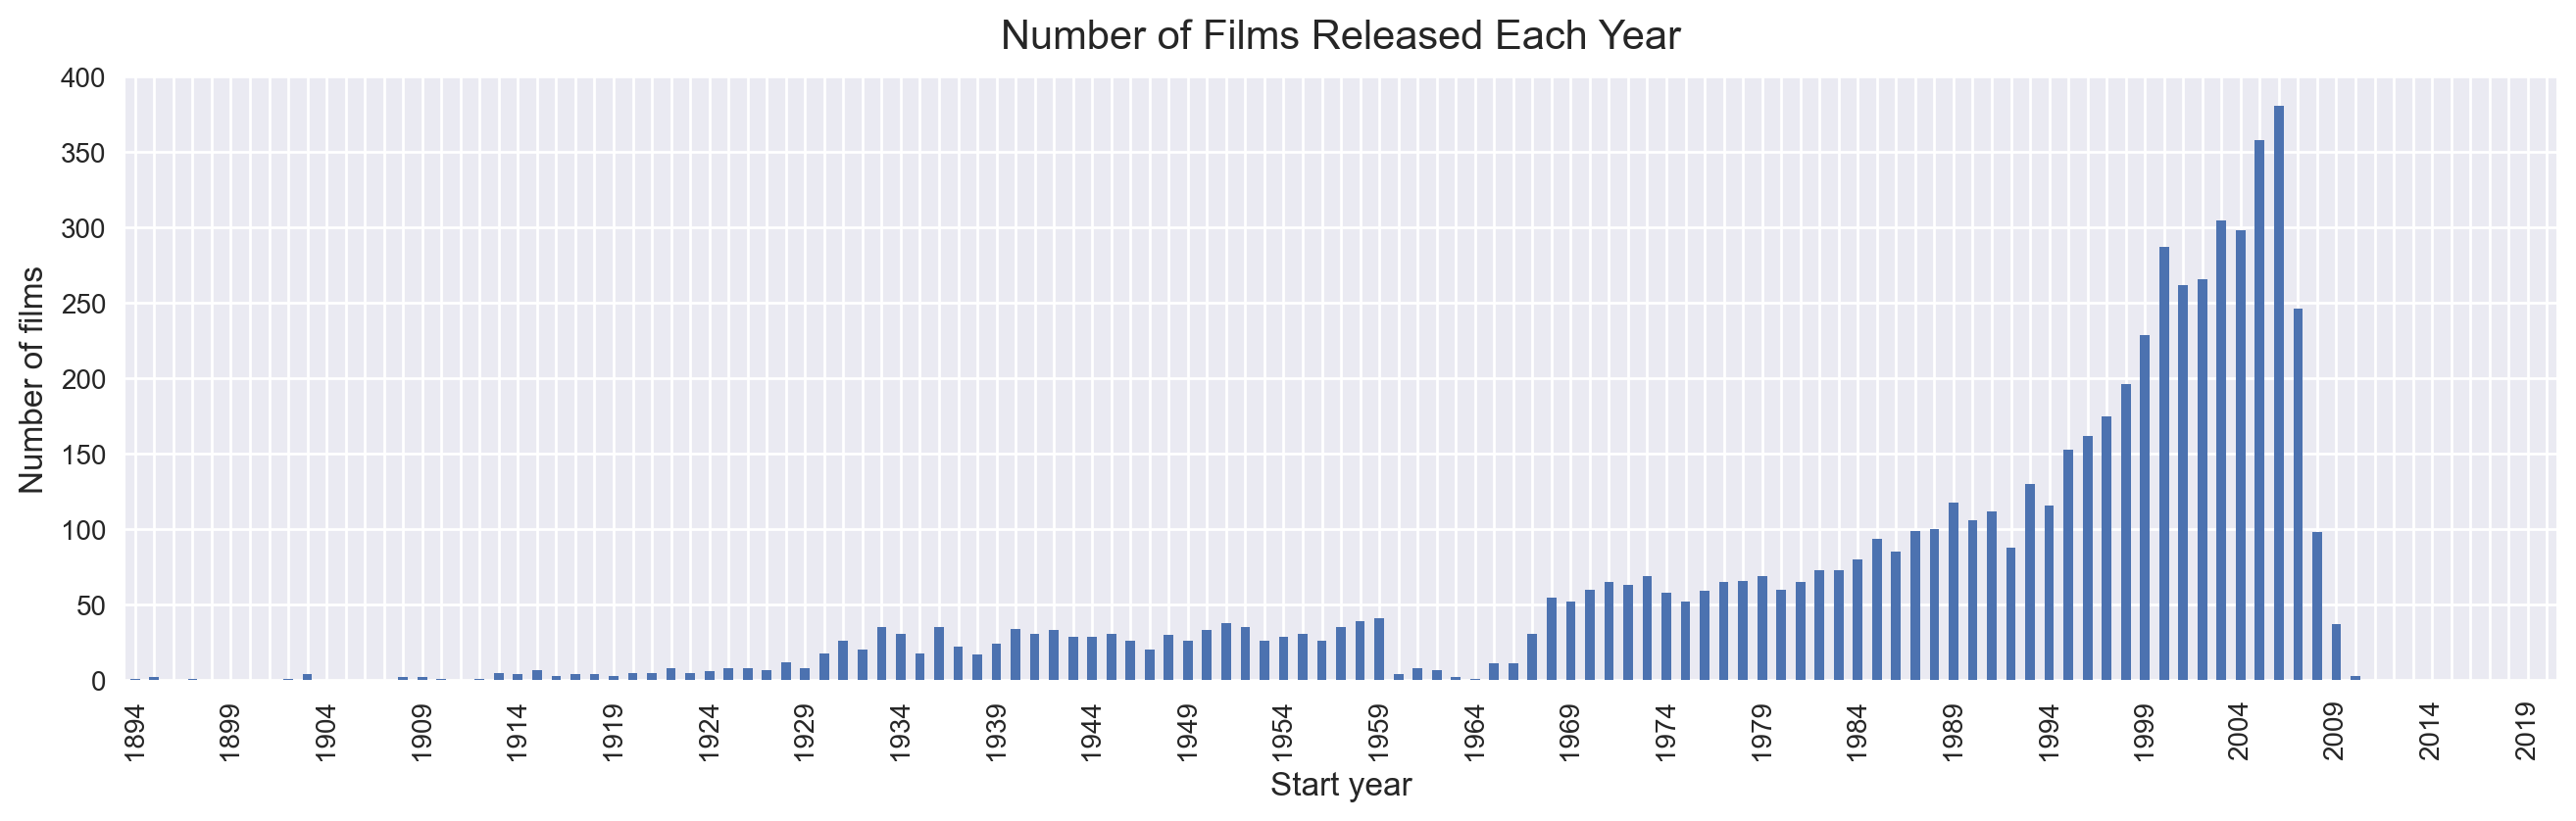

In [17]:
# Jumlah film yang dirilis setiap tahunnya.
fig, ax = plt.subplots(figsize=(16,4))

dft1 = new_df[['tconst', 'start_year']].drop_duplicates()['start_year'].value_counts().sort_index()
dft1 = dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)

# mengatur xtick labels
xtick_labels = ax.get_xticklabels()
plt.setp(xtick_labels, visible=False)
plt.setp(xtick_labels[::5], visible=True)

# atribut grafik
plt.title("Number of Films Released Each Year", size=15, y=1.02)
plt.ylabel("Number of films", size=12)
plt.xlabel("Start year", size=12)

plt.show()


<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Jumlah film yang diluncurkan pada tahun 1894-1929 masih sangat sedikit dan pertumbuhannya tergolong stagnan.
* Pertumbuhan industri film terjadi pada tahun 1930 dan setelahnya, yang ditandai dengan banyaknya film yang bermunculan.
* Pada tahun 1960-1966, terjadi penurunan jumlah produksi film secara drastis dibandingkan tahun-tahun sebelumnya.
* Industri film mulai bangkit kembali pada tahun 1967 dan mencapai puncaknya pada tahun 2006.
* Pada tahun 2007-2010, produksi film kembali menurun secara signifikan.

</div>

<h3 style="font-weight:bold; font-family:Trebuchet MS">Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Tahun 1894-1910 merupakan era pionir industri film. Saat itu teknologi perfilman masih cukup sederhana, sehingga jumlah produksi film saat itu masih sangat sedikit. Pada tahun 1911, mulai bermunculan *silent movies* dimana tidak terdapat dialog di dalam film. Salah satu *silent movies* yang fenomenal, yakni Charlie Chaplin.
* Tahun 1930 merupakan awal banyaknya film-film bermunculan. Pada saat itu merupakan era kebangkitan studio Hollywood.

</div>

## 2) Bagaimana Respon Penikmat Film Setiap Tahun?

Berikut di bawah ini merupakan grafik yang menunjukkan jumlah ulasan positif/negatif setiap tahun (*stacked bar plot*), serta grafik yang menunjukkan rata-rata jumlah review yang diperoleh suatu film setiap tahun (rata-rata selama 5 tahun).

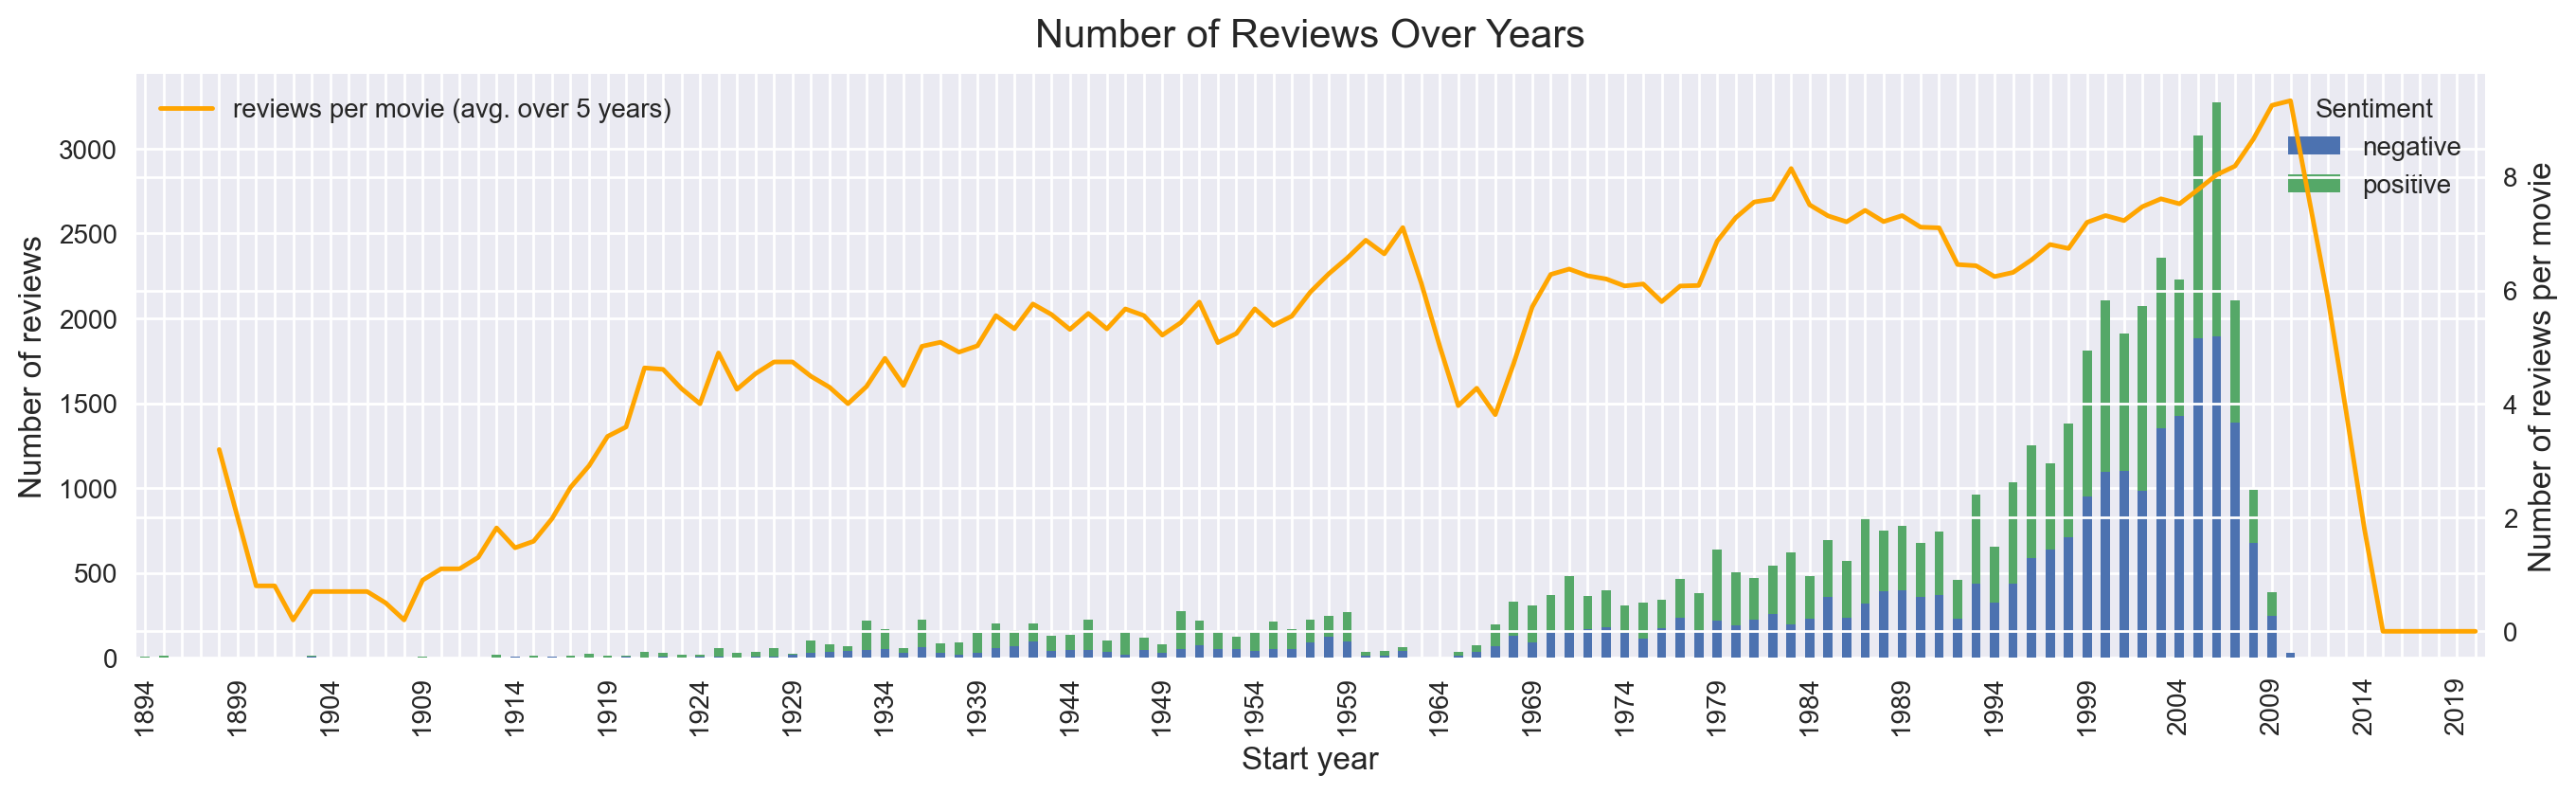

In [18]:
# Jumlah ulasan positif/negatif setiap tahun
dft2 = data.groupby(["start_year", "pos"])["pos"].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

# jumlah review film setiap tahun
dft3 = data["start_year"].value_counts().sort_index()
dft3 = dft3.reindex(index=np.arange(dft3.index.min(), max(dft3.index.max(), 2021))).fillna(0)

# Jumlah review per film setiap tahun (rata-rata selama 5 tahun)
dft4 = (dft3/dft1).fillna(0)
dft4 = dft4.rolling(5).mean()

# grafik
fig, ax = plt.subplots(figsize=(16,4))
axt = ax.twinx()
dft2.plot(kind='bar', stacked=True, ax=ax)
dft4.reset_index(drop=True).plot(kind='line', color='orange', ax=axt, label="reviews per movie (avg. over 5 years)")

# mengatur xtick labels
xtick_labels = ax.get_xticklabels()
plt.setp(xtick_labels, visible=False)
plt.setp(xtick_labels[::5], visible=True)

# atribut grafik
plt.title("Number of Reviews Over Years", size=15, y=1.02)
ax.set_ylabel("Number of reviews", size=12)
axt.set_ylabel("Number of reviews per movie", size=12)
ax.set_xlabel("Start year", size=12)

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, ['negative','positive'], loc='upper right', title="Sentiment")
lines, labels = axt.get_legend_handles_labels()
axt.legend(lines, labels, loc='upper left')

plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Jumlah review untuk sebuah film memiliki tren positif. Hal ini menunjukkan antusias penikmat film yang semakin meningkat setiap tahun.
* Film-film yang dirilis pasca tahun 2000 mengalami peningkatan proporsi ulasan negatif dibandingkan masa sebelumnya.

</div>

Berikut di bawah ini merupakan grafik yang menunjukkan distribusi jumlah ulasan pada suatu film. Distribusi disajikan dalam bentuk *bar plot* dan KDE *plot*.

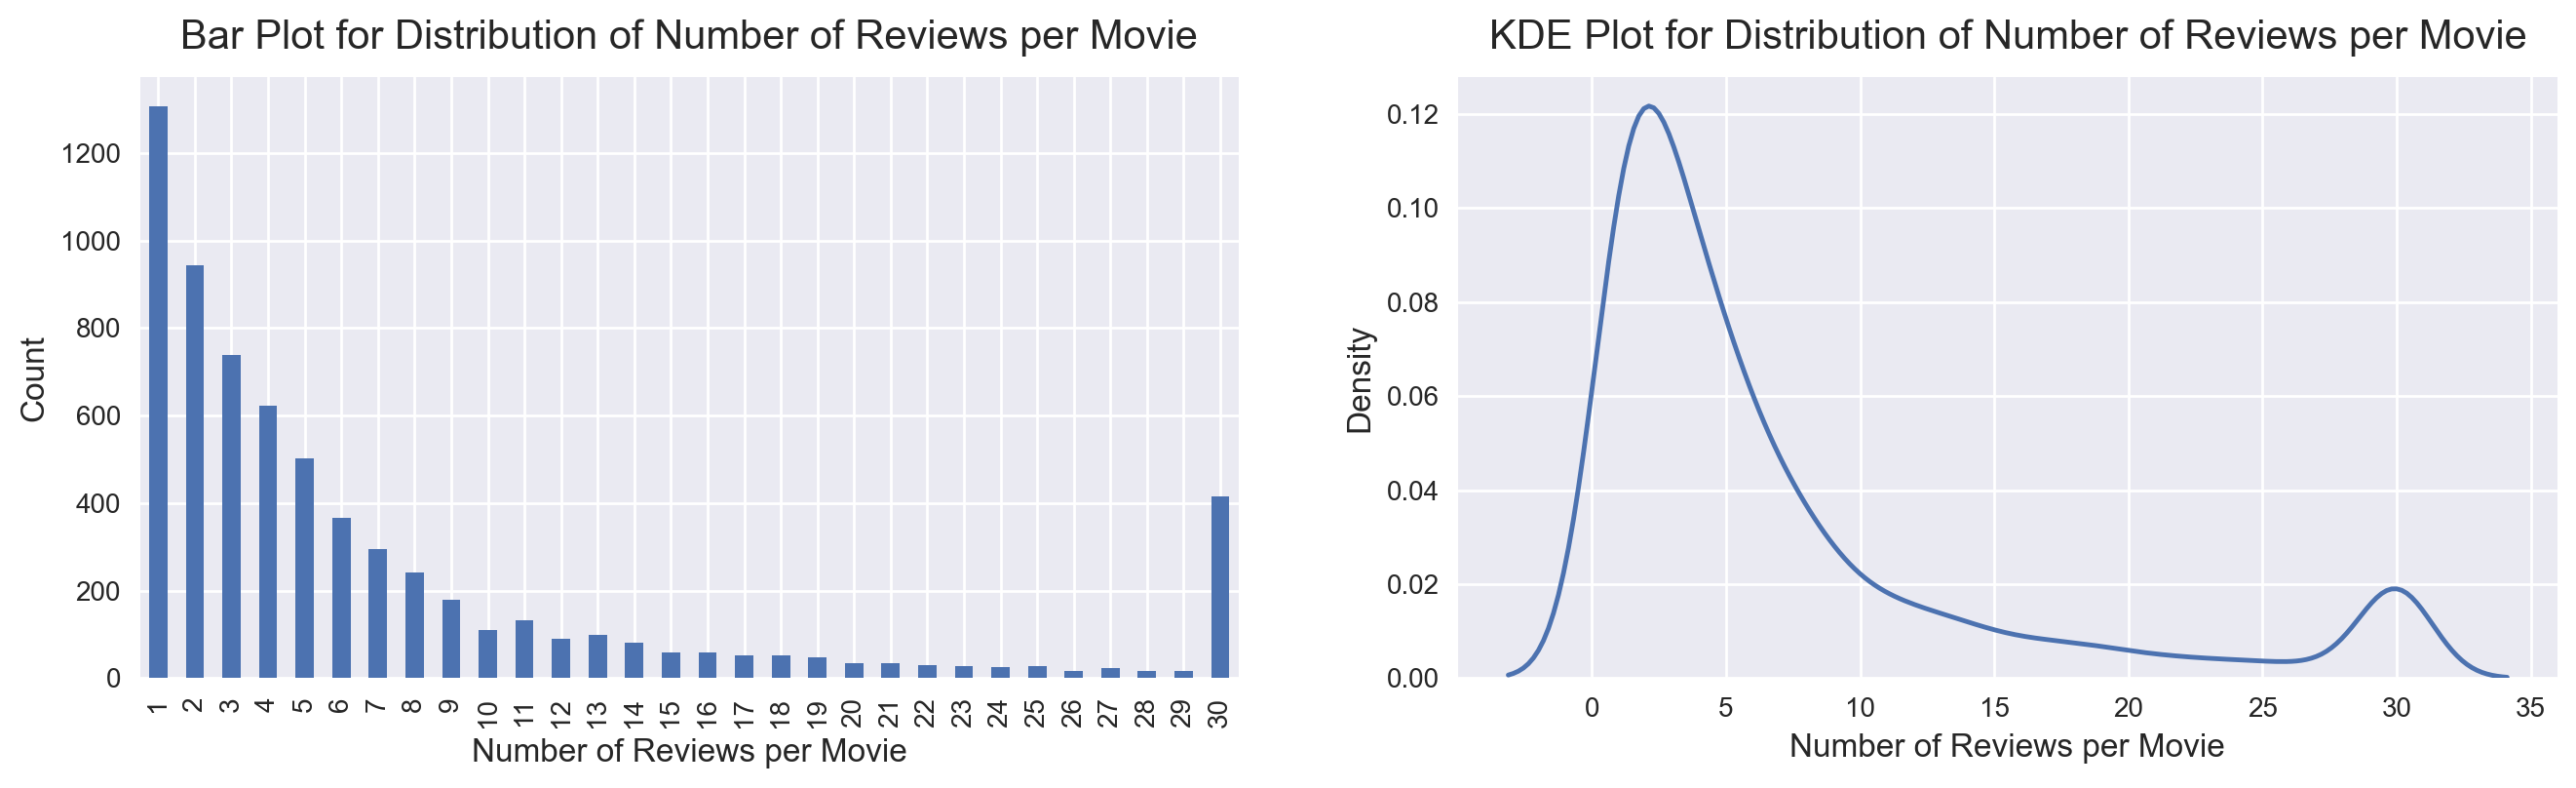

In [19]:
# jumlah ulasan untuk masing-masing film
dft5 = data.groupby("tconst")["review"].count()
dft6 = dft5.value_counts().sort_index()

# grafik
fig, ax = plt.subplots(ncols=2, figsize=(16,4))
dft6.plot(kind="bar", ax=ax[0])
sns.kdeplot(dft5, ax=ax[1])

# atribut grafik
ax[0].set_title("Bar Plot for Distribution of Number of Reviews per Movie", size=15, y=1.02)
ax[1].set_title("KDE Plot for Distribution of Number of Reviews per Movie", size=15, y=1.02)
ax[0].set_ylabel("Count", size=12)
ax[1].set_ylabel("Density", size=12)
ax[0].set_xlabel("Number of Reviews per Movie", size=12)
ax[1].set_xlabel("Number of Reviews per Movie", size=12)

plt.show()


<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Distribusi jumlah ulasan pada suatu film memiliki distribusi *right-skew*. Hal ini berarti, mayoritas film tidak banyak diulas.
* Nilai tipikal jumlah ulasan pada suatu film yakni 4 ulasan/film (berdasarkan median).
* Ditemukan anomali pada distribusi di atas, dimana terdapat sebanyak 415 film yang memiliki jumlah ulasan sebanyak 30 ulasan/film. Anomali ini mengakibatkan terbentuknya multi-mode di dalam data, yaitu pada 1 ulasan/film dan 30 ulasan/film.

</div>

## 3) Bagaimana Karakter Ulasan Untuk Setiap Polaritas?

Berikut di bawah ini merupakan *Word Cloud* yang menunjukkan kata-kata yang banyak digunakan pada ulasan positif maupun negatif.

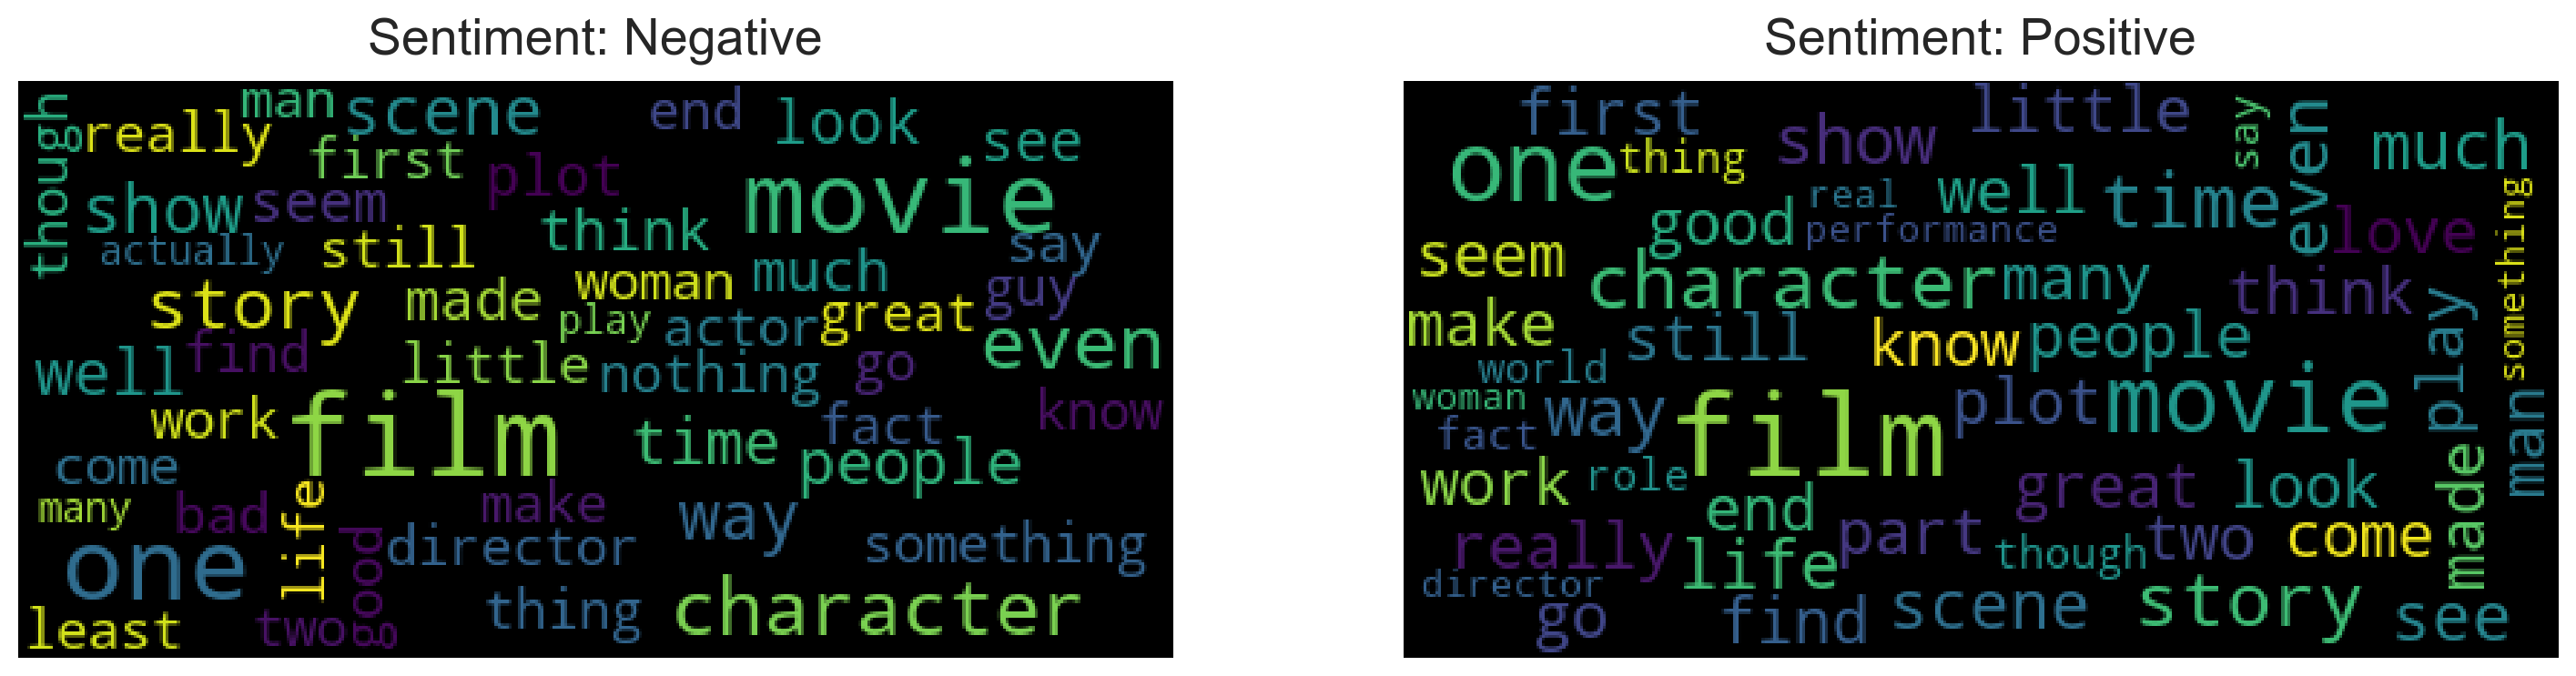

In [20]:
# menggabungkan seluruh ulasan dengan pengelompokan polaritas
neg_review = ' '.join(new_df.query("pos==0")['prep_review'].values)
pos_review = ' '.join(new_df.query("pos==1")['prep_review'].values)

max_words = 50
max_font_size=40
random_state=101010

neg_wordcloud = WordCloud(max_words=max_words, max_font_size=max_font_size,
                          random_state=random_state).generate(neg_review)
pos_wordcloud = WordCloud(max_words=max_words, max_font_size=max_font_size,
                          random_state=random_state).generate(pos_review)

# show image
fig, ax = plt.subplots(ncols=2, figsize=(18,15))
ax[0].imshow(neg_wordcloud)
ax[1].imshow(pos_wordcloud)
ax[0].set_title("Sentiment: Negative", size=20, y=1.02)
ax[1].set_title("Sentiment: Positive", size=20, y=1.02)
ax[0].axis('off')
ax[1].axis('off')
plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Kata `'film'`, `'movie'`, `'character'`, `'story'` dan `'scene'` merupakan unsur kata yang dapat ditemukan pada hampir seluruh ulasan, baik ulasan positif maupun negatif. Hal ini menunjukkan bahwa kata-kata tersebut menjadi poin utama pada ulasan penikmat film.
* Ulasan negatif dapat memiliki unsur kata `'bad'` maupun `'good'`, sedangkan ulasan positif mayoritas memiliki unsur kata `'good'`. Hal ini menunjukkan bahwa sebuah ulasan negatif tetap menunjukkan penilaian positif meski lebih menyorot pada sisi negatif.
</div>

## 4) Perbandingan Dataset Training dan Testing Pada Sejumlah Parameter

Berikut di bawah ini merupakan grafik yang menunjukkan distribusi *rating* film pada dataset *training* dan *testing*.

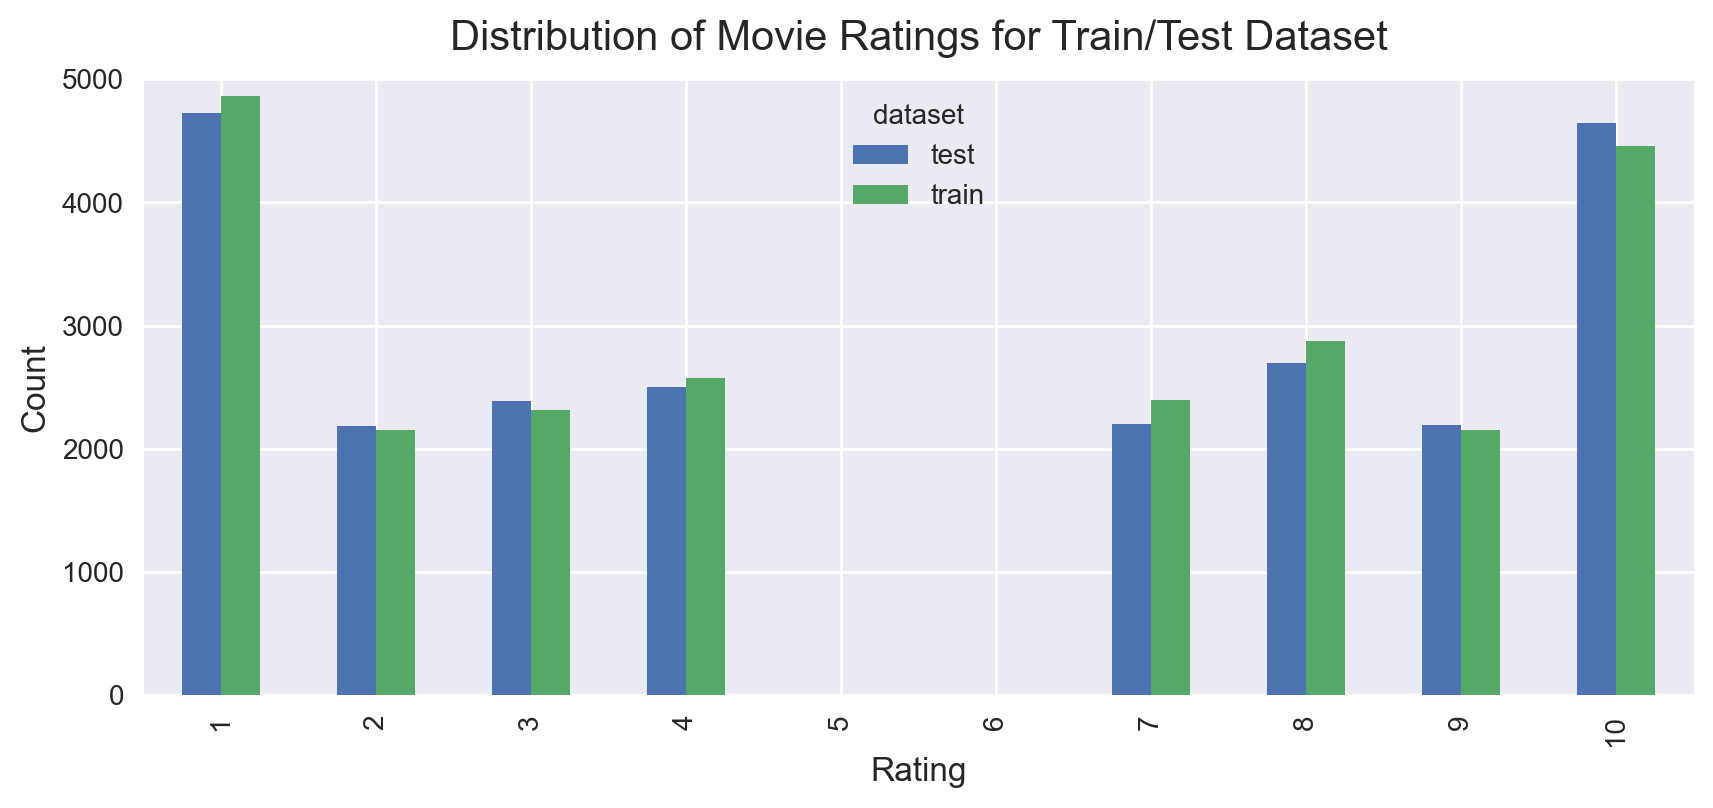

In [21]:
# Distribusi Rating Film Untuk Dataset Training dan Testing
dft7 = data.groupby("ds_part")['rating'].value_counts().sort_index().unstack(level=0)
dft7 = dft7.reindex(index=np.arange(1,11)).fillna(0)

# grafik
fig, ax = plt.subplots(figsize=(10,4))
dft7.plot(kind='bar', ax=ax)
ax.set_ylim(0,5000)
ax.legend(loc='upper center', title='dataset')
ax.set_xlabel('Rating', size=12)
ax.set_xlabel('Rating', size=12)
ax.set_ylabel('Count', size=12)
ax.set_title("Distribution of Movie Ratings for Train/Test Dataset", size=15, y=1.02)
plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Distribusi *rating* film untuk dataset *training* dan *testing* memiliki distribusi yang serupa. Hal ini menunjukkan bahwa komposisi film antar kedua dataset berimbang berdasarkan tingkat penilaian penikmat film.
* *Rating* bernilai 5 dan 6 memiliki frekuensi paling minimum. Adapun *rating* film bernilai 1 dan 10 memiliki frekuensi maksimum. Hal ini menunjukkan bahwa penikmat film lebih cenderung menggunakan nilai yang ekstrim saat menilai sebuah film, alih-alih menggunakan nilai pertengahan seperti 5 dan 6. 
</div>

Berikut di bawah ini merupakan grafik yang menunjukkan distribusi jumlah ulasan pada sentimen yang berbeda untuk dataset *training* dan *testing*.

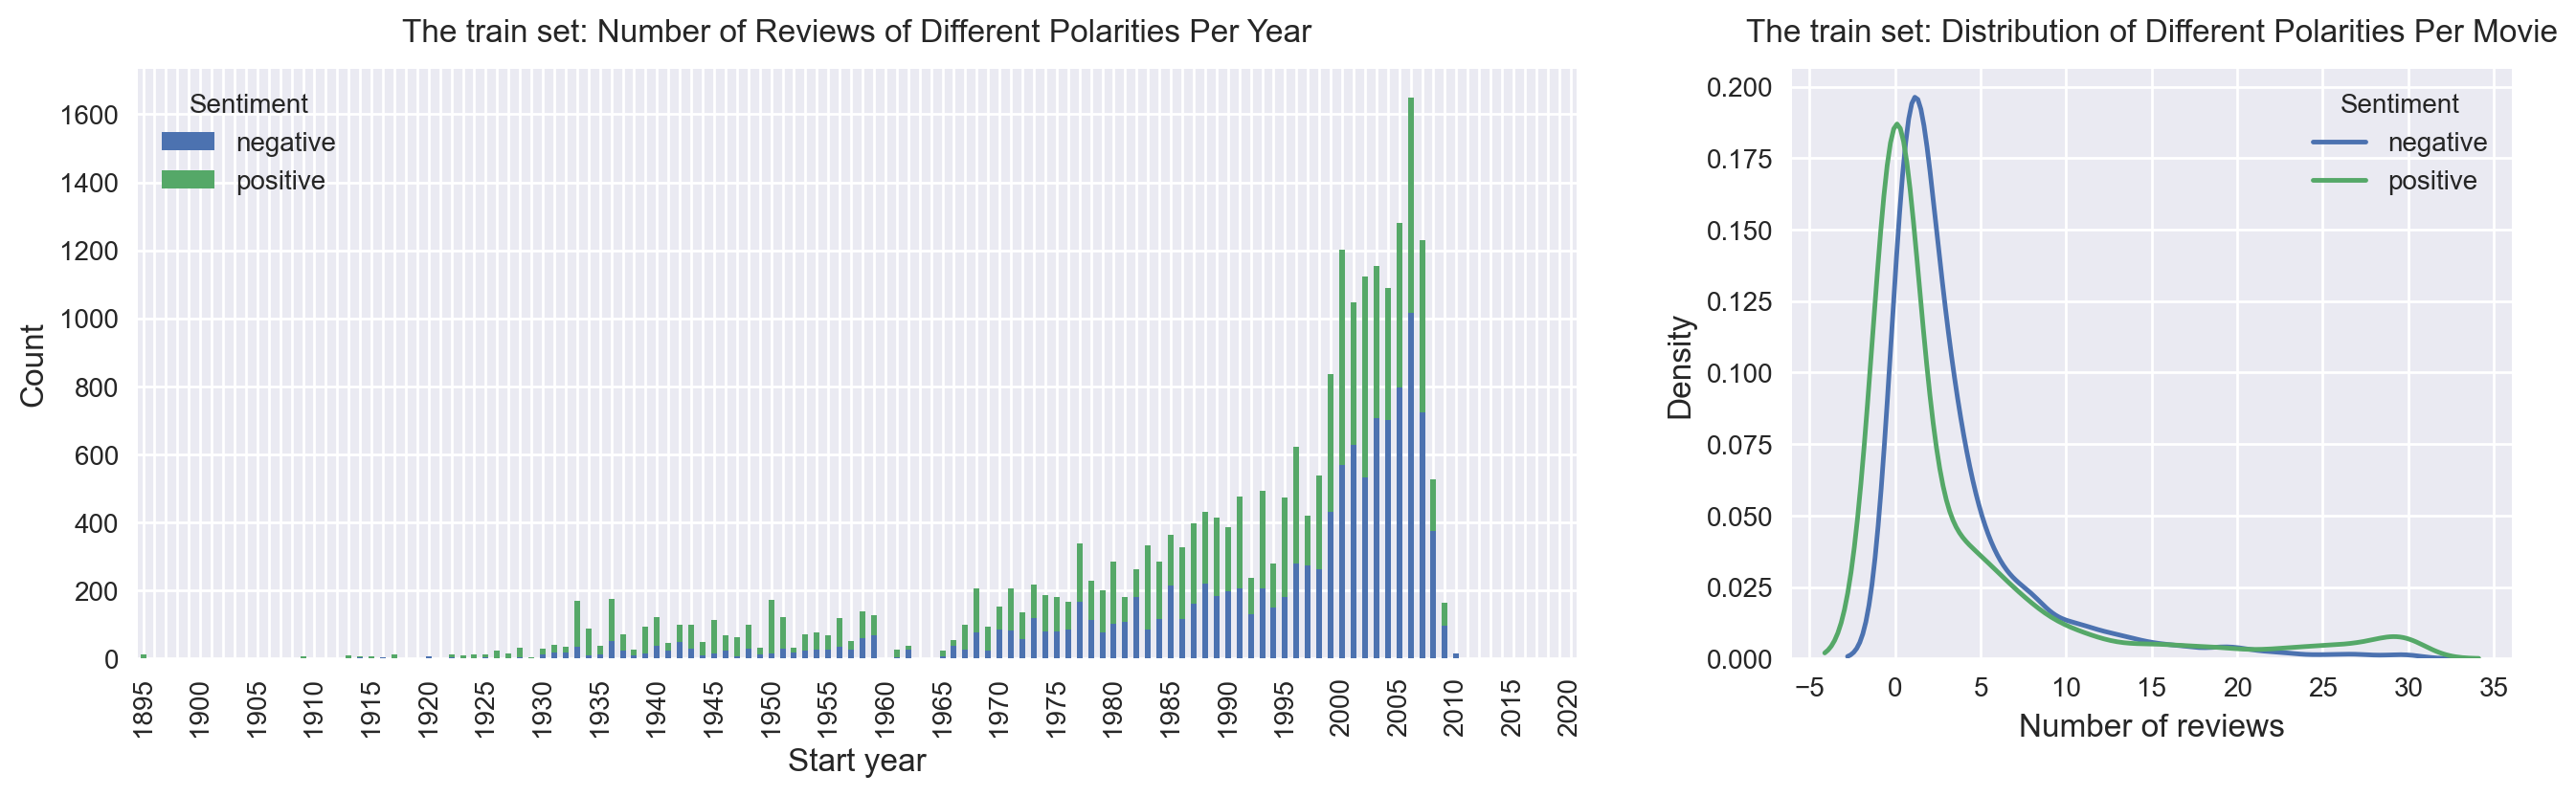

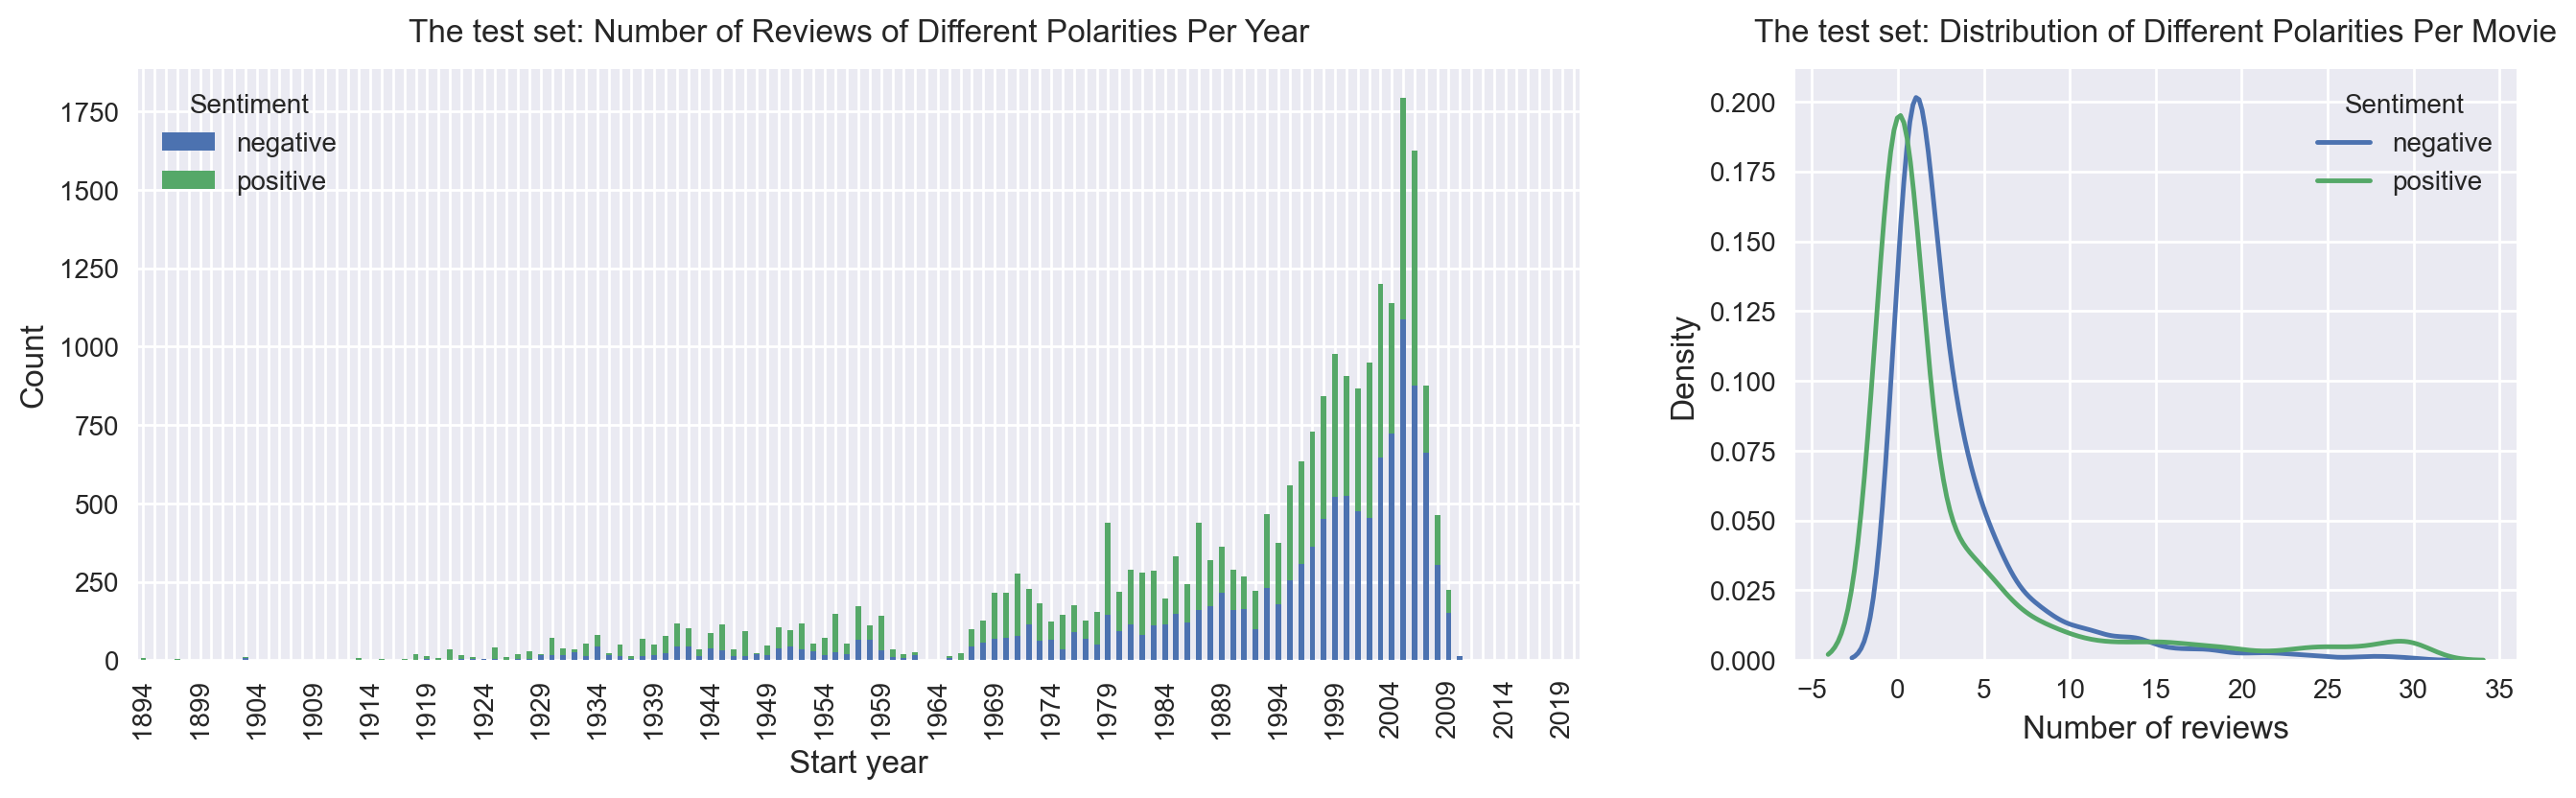

In [22]:
# Jumlah ulasan positif/negatif setiap tahun (pada train/test dataset)
dft8_train = data.query("ds_part=='train'").groupby(['start_year', 'pos'])['pos'].count().unstack()
dft8_train = dft8_train.reindex(index=np.arange(dft8_train.index.min(), max(dft8_train.index.max(), 2021))).fillna(0)

dft8_test = data.query("ds_part=='test'").groupby(['start_year', 'pos'])['pos'].count().unstack()
dft8_test = dft8_test.reindex(index=np.arange(dft8_test.index.min(), max(dft8_test.index.max(), 2021))).fillna(0)

# Jumlah ulasan positif/negatif yang diperoleh setiap film (pada train/test dataset)
dft9_train = data.query("ds_part=='train'").groupby(['tconst', 'pos'])['pos'].count().unstack().fillna(0)
dft9_test = data.query("ds_part=='test'").groupby(['tconst', 'pos'])['pos'].count().unstack().fillna(0)

for i in ['train', 'test']:
    # grafik
    fig, ax = plt.subplots(ncols=2, figsize=(16,4), width_ratios=[2,1])
    
    if i=='train':
        dft8_train.plot(kind='bar', stacked=True, ax=ax[0])
        sns.kdeplot(data=dft9_train[0], label='negative', ax=ax[1])
        sns.kdeplot(data=dft9_train[1], label='positive', ax=ax[1])
    else:
        dft8_test.plot(kind='bar', stacked=True, ax=ax[0])
        sns.kdeplot(data=dft9_test[0], label='negative', ax=ax[1])
        sns.kdeplot(data=dft9_test[1], label='positive', ax=ax[1])

    # mengatur xtick labels
    xtick_labels = ax[0].get_xticklabels()
    plt.setp(xtick_labels, visible=False)
    plt.setp(xtick_labels[::5], visible=True)

    # atribut grafik
    ax[1].set_title(f"The {i} set: Distribution of Different Polarities Per Movie", size=12, y=1.02)
    ax[0].set_title(f"The {i} set: Number of Reviews of Different Polarities Per Year", size=12, y=1.02)
    ax[0].set_ylabel("Count", size=12)
    ax[1].set_ylabel("Density", size=12)
    ax[0].set_xlabel("Start year", size=12)
    ax[1].set_xlabel("Number of reviews", size=12)
    ax[0].legend(labels=['negative', 'positive'], title='Sentiment', loc='upper left')
    ax[1].legend(title='Sentiment', loc='upper right')

plt.show()

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Distribusi jumlah ulasan pada sentimen yang berbeda setiap tahunnya untuk kedua dataset memiliki distribusi yang serupa. Begitu pula pada distribusi jumlah ulasan per film untuk setiap polaritas, yang memiliki distribusi serupa untuk kedua dataset.
* Modus jumlah ulasan per film pada ulasan negatif lebih besar dibandingkan ulasan positif. Hal ini menunjukkan bahwa jumlah ulasan negatif lebih banyak dibandingkan ulasan positif di dalam dataset ini.
* Pada analisis sebelumnya, diketahui bahwa terdapat multi-mode pada distribusi jumlah ulasan per film. Dari KDE plot di atas dapat diketahui bahwa penyebab munculnya sub-mode pada x = 30 ulasan/film disebabkan oleh ulasan dengan sentimen positif.
</div>

## 5) Kesimpulan

Dari hasil **Eksplorasi Data Analisis (EDA)**, berikut merupakan kesimpulan yang diperoleh dari sesi ini.
* Jumlah film yang diluncurkan pada tahun 1894-1929 masih sangat sedikit dan pertumbuhannya tergolong stagnan, karena pada masa itu merupakan era pionir industri film.
* Pertumbuhan industri film terjadi pada tahun 1930 dan setelahnya, yang ditandai dengan banyaknya film yang bermunculan. Hal ini didorong oleh kebangkitan studio Hollywood.
* Fase puncak industri film dalam rentang tahun 1894-2010 terjadi pada tahun 2005-2006.
* Jumlah *review* untuk sebuah film memiliki tren positif. Hal ini menunjukkan antusias penikmat film yang semakin meningkat setiap tahun.
* Film-film yang dirilis pasca tahun 2000 mengalami peningkatan proporsi ulasan negatif dibandingkan masa sebelumnya.
* Nilai tipikal jumlah ulasan pada suatu film yakni 4 ulasan/film (berdasarkan median).
* Kata `'film'`, `'movie'`, `'character'`, `'story'` dan `'scene'` merupakan unsur kata yang dapat ditemukan pada hampir seluruh ulasan, baik ulasan positif maupun negatif. Hal ini menunjukkan bahwa kata-kata tersebut menjadi poin utama pada ulasan penikmat film.
* Ulasan negatif dapat memiliki unsur kata `'bad'` maupun `'good'`, sedangkan ulasan positif mayoritas memiliki unsur kata `'good'`. Hal ini menunjukkan bahwa sebuah ulasan negatif tetap menunjukkan penilaian positif meski lebih menyorot pada sisi negatif.
* *Rating* bernilai 5 dan 6 memiliki frekuensi paling minimum. Adapun *rating* film bernilai 1 dan 10 memiliki frekuensi maksimum. Hal ini menunjukkan bahwa penikmat film lebih cenderung menggunakan nilai yang ekstrim saat menilai sebuah film, alih-alih menggunakan nilai pertengahan seperti 5 dan 6.
* Modus jumlah ulasan per film pada ulasan negatif lebih besar dibandingkan ulasan positif. Hal ini menunjukkan bahwa jumlah ulasan negatif lebih banyak dibandingkan ulasan positif di dalam dataset ini.
* Komposisi data pada dataset *training* dan *testing* memiliki komposisi yang berimbang. Oleh karena itu kedua dataset dapat dilibatkan pada pembangunan model.

# **F. Membangun Model ML**

## 1) *Features Engineering*

Berikut di bawah ini, kita akan melakukan pemisahan antara fitur dan target serta pemisahan dataset *training* dan *testing*. 

Fitur ulasan yang akan digunakan pada model cukup di-*convert* menjadi *lowercase* dan tidak perlu dilakukan pembuangan *noise* (URL, tanda baca, simbol, *hashtag*, dll.) dan tidak perlu melakukan lematisasi karena model BERT memiliki sistem *Attention* yang dapat mencari token-token penting.

In [23]:
# melakukan data split
train_df = new_df.query("ds_part=='train'")
test_df = new_df.query("ds_part=='test'")

# pemisahan fitur
x_train = train_df['review'].str.lower().values
x_test = test_df['review'].str.lower().values
y_train = train_df['pos'].values
y_test = test_df['pos'].values

# menampilkan ukuran set
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)

x_train.shape: (23759,)
x_test.shape: (23483,)


Proses selanjutnya, yaitu melakukan *word embedding* untuk teks ulasan menggunakan model BERT. Pada tahap awal, teks harus di-*tokenize* sehingga teks ulasan dapat dipecah berdasarkan token yang tersedia pada korpus.

In [24]:
# melakukan tokenisasi
tokenizer = transformers.BertTokenizer.from_pretrained("bert-base-uncased")
bert_config = transformers.BertConfig.from_pretrained("bert-base-uncased")

max_length = bert_config.max_position_embeddings
print("max_length:", max_length)

def tokenize_with_bert(texts):
    ids_list = []
    attention_mask_list = []
    
    # variabel untuk melihat jumlah token minimum dan maksimum pada texts (sebelum padding)
    min_tokenized_text_length = np.inf
    max_tokenized_text_length = 0
    
    for text in texts:
        ids = tokenizer.encode(text.lower(), add_special_tokens=True, truncation=True, 
                               max_length=max_length)
        
        if len(ids)>max_tokenized_text_length:
            max_tokenized_text_length = len(ids)
        if len(ids)<min_tokenized_text_length:
            min_tokenized_text_length = len(ids)
        
        padded = np.array(ids + (max_length-len(ids))*[0])
        attention_mask = np.where(padded!=0, 1, 0)
        
        ids_list.append(padded)
        attention_mask_list.append(attention_mask)
        
    print(f"Panjang token minimum: {min_tokenized_text_length}")
    print(f"Panjang token maksimum: {max_tokenized_text_length}")
    
    return ids_list, attention_mask_list

max_length: 512


In [25]:
# melakukan tokenizing
print("--- Tokenize data x_train ---")
x_train_ids, x_train_attmask = tokenize_with_bert(x_train)

print("\n--- Tokenize data x_test ---")
x_test_ids, x_test_attmask = tokenize_with_bert(x_test)

--- Tokenize data x_train ---
Panjang token minimum: 13
Panjang token maksimum: 512

--- Tokenize data x_test ---
Panjang token minimum: 10
Panjang token maksimum: 512


Teks ulasan telah dikonversi menjadi token numerik dengan ukuran vektor sebesar 512 token (setelah di-*padding*). Berikutnya, kita akan memasukkan token tersebut ke dalam model BERT untuk dilakukan *word embedding*. 

In [26]:
# memeriksa device GPU
!nvidia-smi

Sun May  5 17:56:34 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 546.12                 Driver Version: 546.12       CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce GTX 1650 Ti   WDDM  | 00000000:01:00.0  On |                  N/A |
| N/A   54C    P8               4W /  50W |     87MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [27]:
# mengatur ukuran batch dan device untuk word embedding
batch_size = 32
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Menggunakan device: {device}")

# iniasiasi model BERT
model_bert = transformers.BertModel.from_pretrained("bert-base-uncased").to(device)
print(f"BERT hidden_size: {bert_config.hidden_size}\n")

# membuat function untuk word embedding
def embedding_with_bert(ids_list, attention_mask_list):
    embeddings = []
    
    for i in tqdm(range(len(ids_list)//batch_size + 1)):
        ids_batch = torch.LongTensor(ids_list[i*batch_size : (i+1)*batch_size]).to(device)
        attention_mask_batch = torch.LongTensor(attention_mask_list[i*batch_size : (i+1)*batch_size]).to(device)
        
        with torch.no_grad():
            model_bert.eval()
            embeddings_batch = model_bert(ids_batch, attention_mask = attention_mask_batch)
            
        embeddings.append(embeddings_batch.last_hidden_state.mean(dim=1).detach().cpu().numpy())
    
    return np.concatenate(embeddings)

# melakukan word embedding
directory = './word_embedding/'
path = directory + 'vector_768.npz'

if not os.path.exists(path):
    print("----- Word Embedding: x_train_ids -----")
    x_train_vec = embedding_with_bert(x_train_ids, x_train_attmask)

    print("\n----- Word Embedding: x_test_ids -----")
    x_test_vec = embedding_with_bert(x_test_ids, x_test_attmask)
    
    # menyimpan vector
    os.mkdir(directory)
    np.savez_compressed(path, x_train_vec=x_train_vec, x_test_vec=x_test_vec)
    
else:
    print("Word embedding telah dilakukan. File vektor tersedia pada direktori.")
    x_train_vec = np.load(path)['x_train_vec']
    x_test_vec = np.load(path)['x_test_vec']

Menggunakan device: cuda
BERT hidden_size: 768

Word embedding telah dilakukan. File vektor tersedia pada direktori.


In [28]:
# memeriksa ukuran data yang akan dimasukkan ke model
print(f"x_train_vec.shape: {x_train_vec.shape}")
print(f"y_train.shape    : {y_train.shape}")
print(f"x_test_vec.shape : {x_test_vec.shape}")
print(f"y_test.shape     : {y_test.shape}")

x_train_vec.shape: (23759, 768)
y_train.shape    : (23759,)
x_test_vec.shape : (23483, 768)
y_test.shape     : (23483,)


## 2) *Baseline Model*

Berdasarkan hasil **Analisa Data Eksploratif (EDA)**, diketahui bahwa suatu ulasan negatif akan cenderung memiliki kata `'bad'` dan/atau `'good'`. Adapun ulasan positif akan cenderung memiliki kata `'good'`. Oleh karena itu, *baseline model* yang akan digunakan adalah model yang mengklasifikasikan ulasan berdasarkan kata kunci tertentu.

Model akan memprediksi suatu ulasan sebagai ulasan negatif (0) jika memiliki kata kunci `'bad'` di dalamnya. Sebaliknya, apabila suatu ulasan tidak mengandung kata kunci tersebut, maka model akan mengklasifikasikan ulasan tersebut sebagai ulasan positif (1).

In [29]:
# membuat baseline model
def keyword_model(texts, keyword:str, x, y):
    """
    Jika keyword terdapat di dalam text, maka akan diberi label x. 
    Dan apabila sebaliknya, maka diberi label y.
    """
    predict = []
    
    for text in texts:
        if re.search(r'\b' + re.escape(keyword) + r'\b', text):
            predict.append(x)
        else:
            predict.append(y)
            
    return np.array(predict)

# melakukan prediksi training set
bm_predict = keyword_model(x_train, 'bad', 0, 1)

# evaluasi model
print(f'f1 score       : {f1_score(y_train, bm_predict):.4f}')
print(f'accuracy score : {accuracy_score(y_train, bm_predict):.4f}')

f1 score       : 0.6951
accuracy score : 0.6151


Dari hasil di atas, diperoleh F1-skor sebesar 0,70 dan akurasi sebesar 0,62. Hasil evaluasi ini akan menjadi salah satu tolak ukur apakah suatu model layak atau tidak untuk digunakan.

## 3) Optimasi Model

Berikut merupakan *function* untuk melakukan *cross validation* agar dapat mengetahui kualitas model melalui metrik akurasi dan skor F1.

In [30]:
def cross_validation(model, x, y, k):
    kf = KFold(n_splits=k, shuffle=False)
    output = {'fold':[], 'f1_train':[], 'acc_train':[], 'f1_val':[], 'acc_val':[]}

    for i, (idx_train, idx_val) in enumerate(kf.split(x,y)):
        x_train = x[idx_train]
        y_train = y[idx_train]
        x_val = x[idx_val]
        y_val = y[idx_val]

        # melatih model
        model.fit(x_train, y_train)
        predict_train = model.predict(x_train)
        predict_val = model.predict(x_val)

        f1_train = f1_score(y_train, predict_train)
        f1_val = f1_score(y_val, predict_val)
        acc_train = accuracy_score(y_train, predict_train)
        acc_val = accuracy_score(y_val, predict_val)

        output['fold'].append(i+1)
        output['f1_train'].append(f1_train)
        output['acc_train'].append(acc_train)
        output['f1_val'].append(f1_val)
        output['acc_val'].append(acc_val)

    return pd.DataFrame(output)

Berikut merupakan *function* untuk melakukan evaluasi model melalui visualisasi sejumlah metrik.

In [31]:
def evaluate_model(model, x, y, ax, color, label):
    """
    model --> model yang sudah dilatih menggunakan hyperparameter terbaik
    """

    # melakukan prediksi model
    predict_proba = model.predict_proba(x)[:, 1]

    # menghitung f1-score pada sejumlah nilai threshold
    f1_thresholds = np.arange(0, 1.01, 0.05)
    f1 = [f1_score(y, predict_proba>=threshold) for threshold in f1_thresholds]
    
    # menghitung TPR/FPR untuk kurva ROC dan ROC-AUC
    fpr, tpr, roc_thresholds = roc_curve(y, predict_proba)
    roc_auc = roc_auc_score(y, predict_proba)

    # menghitung Precision/Recall untuk kurva PRC dan APS (average precision score)
    precision, recall, prc_thresholds = precision_recall_curve(y, predict_proba)
    aps = average_precision_score(y, predict_proba)

    # membuat plot f1-score dan marking pada beberapa nilai threshold
    f1_max_idx = np.argmax(f1)
    ax[0].plot(f1_thresholds, f1, color=color, label=f"{label}, max={f1[f1_max_idx]:.2f} @ {f1_thresholds[f1_max_idx]:.2f}")

    for threshold in [0.2, 0.4, 0.5, 0.6, 0.8]:
        closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
        marker_color = 'red' if threshold==0.5 else 'orange'
        ax[0].plot(f1_thresholds[closest_value_idx], f1[closest_value_idx], color=marker_color, marker='X', markersize=7)
    
    ax[0].set_xlim([-0.02, 1.02])    
    ax[0].set_ylim([-0.02, 1.02])
    ax[0].set_xlabel('threshold')
    ax[0].set_ylabel('F1')
    ax[0].legend(loc='lower center')
    ax[0].set_title(f'Skor F1')

    # membuat plot ROC-curve (TPR/FPR) dan marking pada beberapa nilai threshold
    ax[1].plot(fpr, tpr, color=color, label=f"{label}, ROC-AUC={roc_auc:.2f}")
    ax[1].plot([0, 1], [0, 1], color='grey', linestyle='--') # kurva kinerja acak

    for threshold in [0.2, 0.4, 0.5, 0.6, 0.8]:
        closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
        marker_color = 'red' if threshold==0.5 else 'orange'
        ax[1].plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)

    ax[1].set_xlim([-0.02, 1.02])    
    ax[1].set_ylim([-0.02, 1.02])
    ax[1].set_xlabel('FPR')
    ax[1].set_ylabel('TPR')
    ax[1].legend(loc='lower center')        
    ax[1].set_title(f'Kurva ROC')

    # membuat plot PR-curve (precision/recall) dan marking pada beberapa nilai threshold
    ax[2].plot(recall, precision, color=color, label=f"{label}, AP={aps:.2f}")
    ax[2].plot([0, 1], [0, 1], color='grey', linestyle='--') # kurva kinerja acak

    for threshold in [0.2, 0.4, 0.5, 0.6, 0.8]:
        closest_value_idx = np.argmin(np.abs(prc_thresholds-threshold))
        marker_color = 'red' if threshold==0.5 else 'orange'
        ax[2].plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
    
    ax[2].set_xlim([-0.02, 1.02])    
    ax[2].set_ylim([-0.02, 1.02])
    ax[2].set_xlabel('recall')
    ax[2].set_ylabel('precision')
    ax[2].legend(loc='lower center')
    ax[2].set_title(f'PRC')   

### **Logistic Regression**

Pada bagian ini, kita akan melakukan evaluasi model untuk mengetahui nilai akurasi dan *F1-score* melalui validasi silang menggunakan *training set* .

In [32]:
# cross validation
lr_model = LogisticRegression(max_iter=200)
result = cross_validation(lr_model, x_train_vec, y_train, 3)

print(f"{' Threshold = 0.5 ':=^60}")
print(f"Avg.F1 score (cv_train/cv_val): {result['f1_train'].mean():.4f}/{result['f1_val'].mean():.4f}")
print(f"Avg.Accuracy (cv_train/cv_val): {result['acc_train'].mean():.4f}/{result['acc_val'].mean():.4f}")
result

===================== Threshold = 0.5 ======================
Avg.F1 score (cv_train/cv_val): 0.9016/0.8846
Avg.Accuracy (cv_train/cv_val): 0.9021/0.8856


,fold,f1_train,acc_train,f1_val,acc_val
0,1,0.902012,0.901004,0.885934,0.889520
1,2,0.899236,0.901761,0.888752,0.885859
2,3,0.903438,0.903535,0.879259,0.881424


<h4 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h4>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Nilai *F1-score* rata-rata pada *training set* dan *validation set* adalah 0,90 dan 0,88 secara berturut-turut. Dari hasil ini dapat disimpulkan model tidak mengalami *overfitting* karena gap nilai yang dihasilkan tidak terlalu besar. 
* Nilai akurasi rata-rata pada *training set* dan *validation set* adalah 0,90 dan 0,89 secara berturut-turut.
* Performa model sudah dapat memenuhi target proyek, yaitu *F1-score* sebesar 0,85.

</div>

Pada bagian berikutnya, kita akan melatih model pada dataset penuh dan melakukan visualisasi untuk sejumlah metrik. Dari visualisasi ini diharapkan dapat memberi informasi mengenai nilai *threshold* terbaik yang dapat digunakan untuk klasifikasi biner.

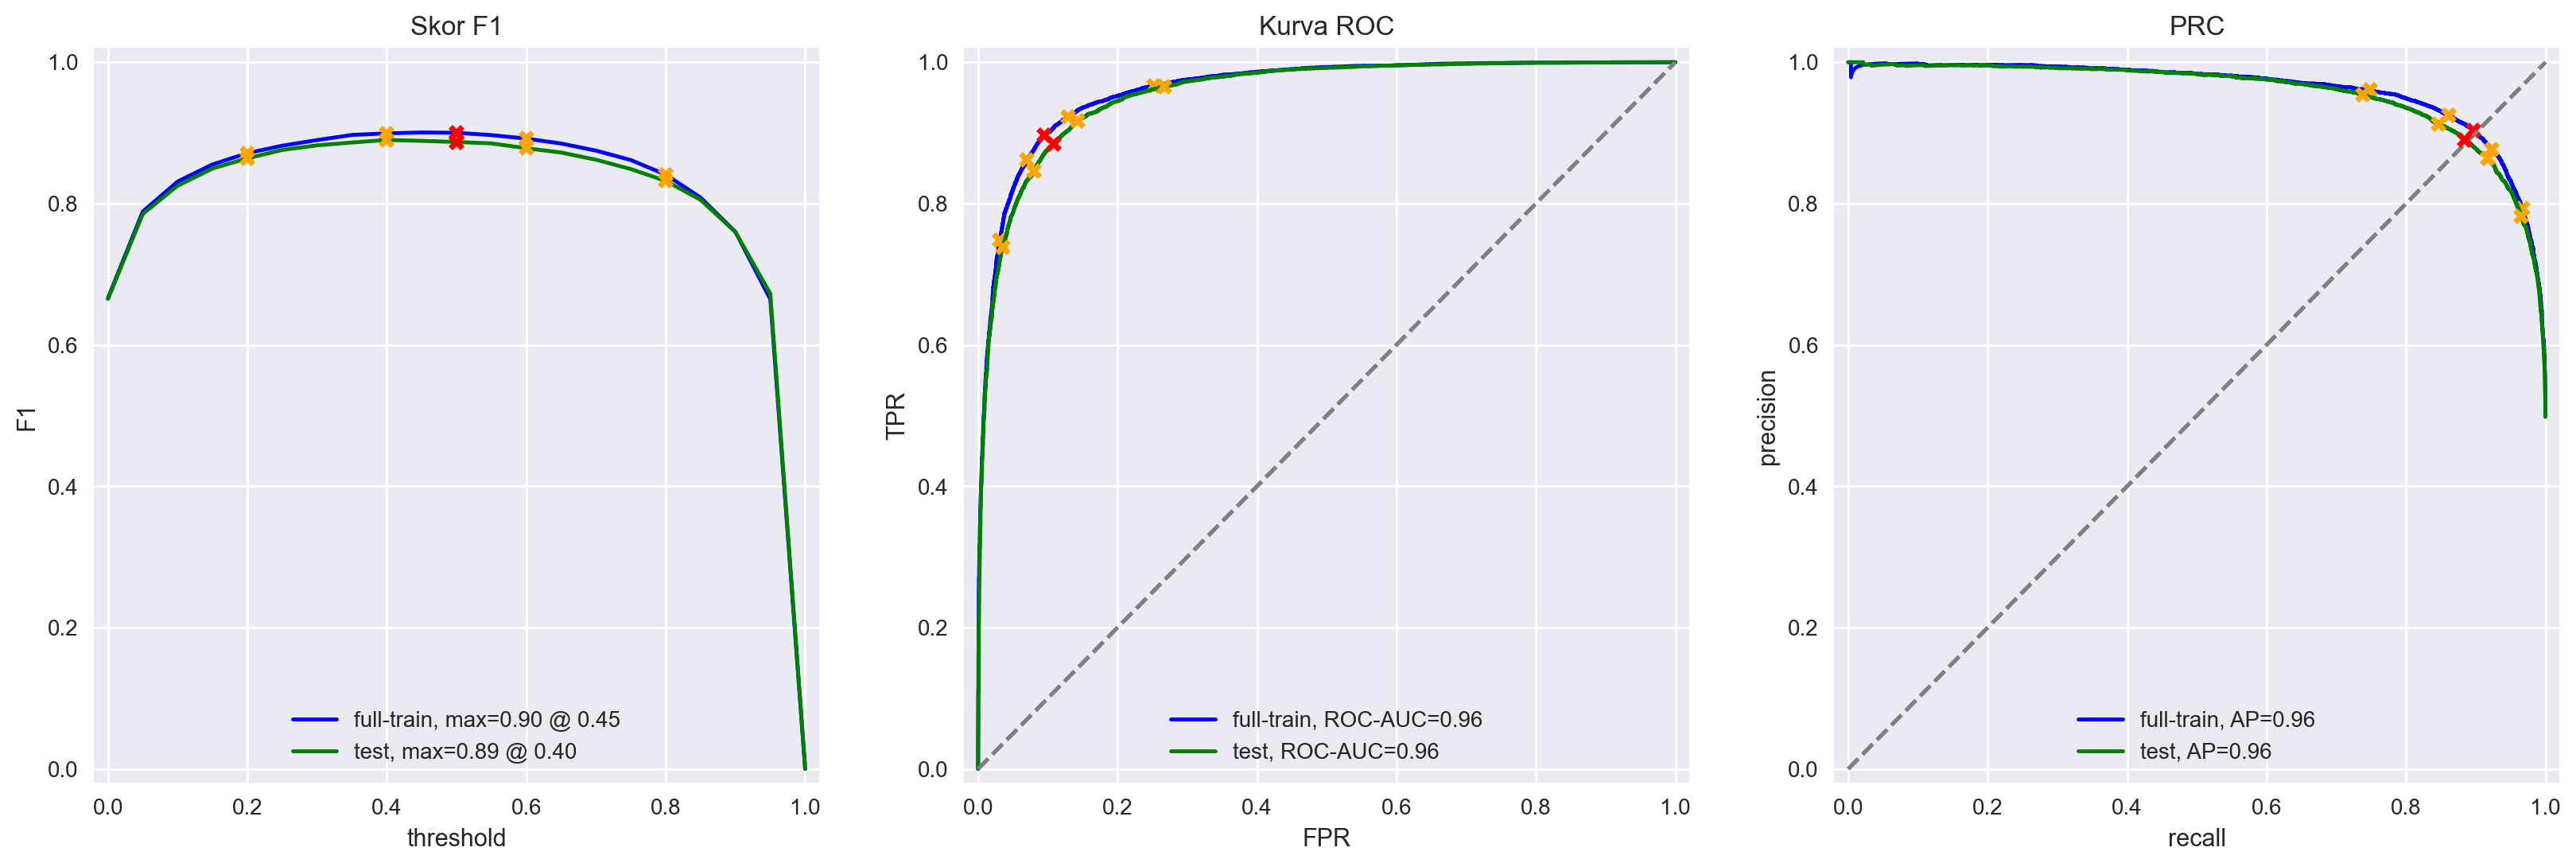

In [33]:
# melatih model pada dataset penuh
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(x_train_vec, y_train)

# visualisasi sejumlah metrik
fig, ax = plt.subplots(ncols=3, figsize=(20, 6))
evaluate_model(lr_model, x_train_vec, y_train, ax=ax, color='blue', label='full-train')
evaluate_model(lr_model, x_test_vec, y_test, ax=ax, color='green', label='test')

<h4 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h4>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari hasil ini dapat terlihat bahwa model tidak mengalami *overfitting* karena gap kurva yang sangat kecil.
* Nilai *threshold* terbaik agar memperoleh *F1-score* maksimum (0,89) yaitu 0,40 berdasarkan prediksi model pada *testing set*.
* Nilai skor ROC-AUC sangat baik, mendekati nilai 1 yaitu sebesar 0,96 berdasarkan prediksi model pada *testing set*.
* Nilai skor *average-precision* (AP) sangat baik, mendekati nilai 1 yaitu sebesar 0,96 berdasarkan prediksi model pada *testing set*.
* Penurunan nilai *threshold* akan mengakibatkan nilai TPR dan FPR meningkat. Peningkatan nilai TPR dan FPR akan bervariasi sebab kurva ROC memiliki bentuk eksponensial. Nilai *threshold* terbaik berdasarkan kurva ROC yaitu 0,5 karena pada posisi tersebut laju peningkatan TPR dan FPR hampir sebanding karena berada pada titik belok.
* Penurunan nilai *threshold* akan mengakibatkan nilai *precision* menurun dan *recall* meningkat. Nilai *threshold* terbaik berdasarkan kurva PR yaitu 0,5 karena pada posisi tersebut laju perubahan *precision* dan *recall* sebanding karena berada pada titik belok.

</div>

### **Support Vector Machine (SVM)**

Pada bagian ini, kita akan melakukan *hyperparameter tuning* untuk mencari konfigurasi model terbaik. Fungsi objektif dari model terbaik yang digunakan yaitu model yang dapat memberikan nilai *F1-score* tertinggi saat memprediksi *validation set* selama proses *cross validation* pada **GridSearchCV**.

In [34]:
%%time
# hyperparameter tuning
svm_model = SVC()
svm_grid_parameter = {'kernel':['linear'], 'C':[0.4, 0.3, 0.2]}
gs_svm = GridSearchCV(svm_model, svm_grid_parameter, scoring='f1', cv=3, n_jobs=-1)
gs_svm.fit(x_train_vec, y_train)

# best model result
result = cross_validation(gs_svm.best_estimator_, x_train_vec, y_train, 3)

print(f"{' Threshold = 0.5 ':=^60}")
print(f"best_params_                  : {gs_svm.best_params_}")
print(f"Avg.F1 score (cv_train/cv_val): {result['f1_train'].mean():.4f}/{result['f1_val'].mean():.4f}")
print(f"Avg.Accuracy (cv_train/cv_val): {result['acc_train'].mean():.4f}/{result['acc_val'].mean():.4f}")
result


===================== Threshold = 0.5 ======================
best_params_                  : {'C': 0.3, 'kernel': 'linear'}
Avg.F1 score (cv_train/cv_val): 0.9017/0.8853
Avg.Accuracy (cv_train/cv_val): 0.9023/0.8863
CPU times: total: 5min
Wall time: 8min 45s


,fold,f1_train,acc_train,f1_val,acc_val
0,1,0.901495,0.900562,0.887903,0.891540
1,2,0.899067,0.901635,0.887740,0.884848
2,3,0.904545,0.904798,0.880186,0.882561


<h4 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h4>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Model terbaik diperoleh dengan konfigurasi *hyperparameter* {'C': 0.3, 'kernel': 'linear'}.
* Nilai *F1-score* rata-rata pada *training set* dan *validation set* adalah 0,90 dan 0,89 secara berturut-turut. Dari hasil ini dapat disimpulkan model tidak mengalami *overfitting* karena gap nilai yang dihasilkan tidak terlalu besar. 
* Nilai akurasi rata-rata pada *training set* dan *validation set* adalah 0,90 dan 0,89 secara berturut-turut.
* Performa model sudah dapat memenuhi target proyek, yaitu *F1-score* sebesar 0,85.
* Berdasarkan hasil *F1-score* menunjukkan kualitas model SVM hampir sama dengan model *logistic regression*, akan tetapi beban komputasi untuk model SVM lebih besar sehingga model *logistic regression* masih lebih baik.

</div>

Pada bagian berikutnya, kita akan melatih model pada dataset penuh dan melakukan visualisasi untuk sejumlah metrik. Dari visualisasi ini diharapkan dapat memberi informasi mengenai nilai *threshold* terbaik yang dapat digunakan untuk klasifikasi biner.

CPU times: total: 9min 50s
Wall time: 9min 51s


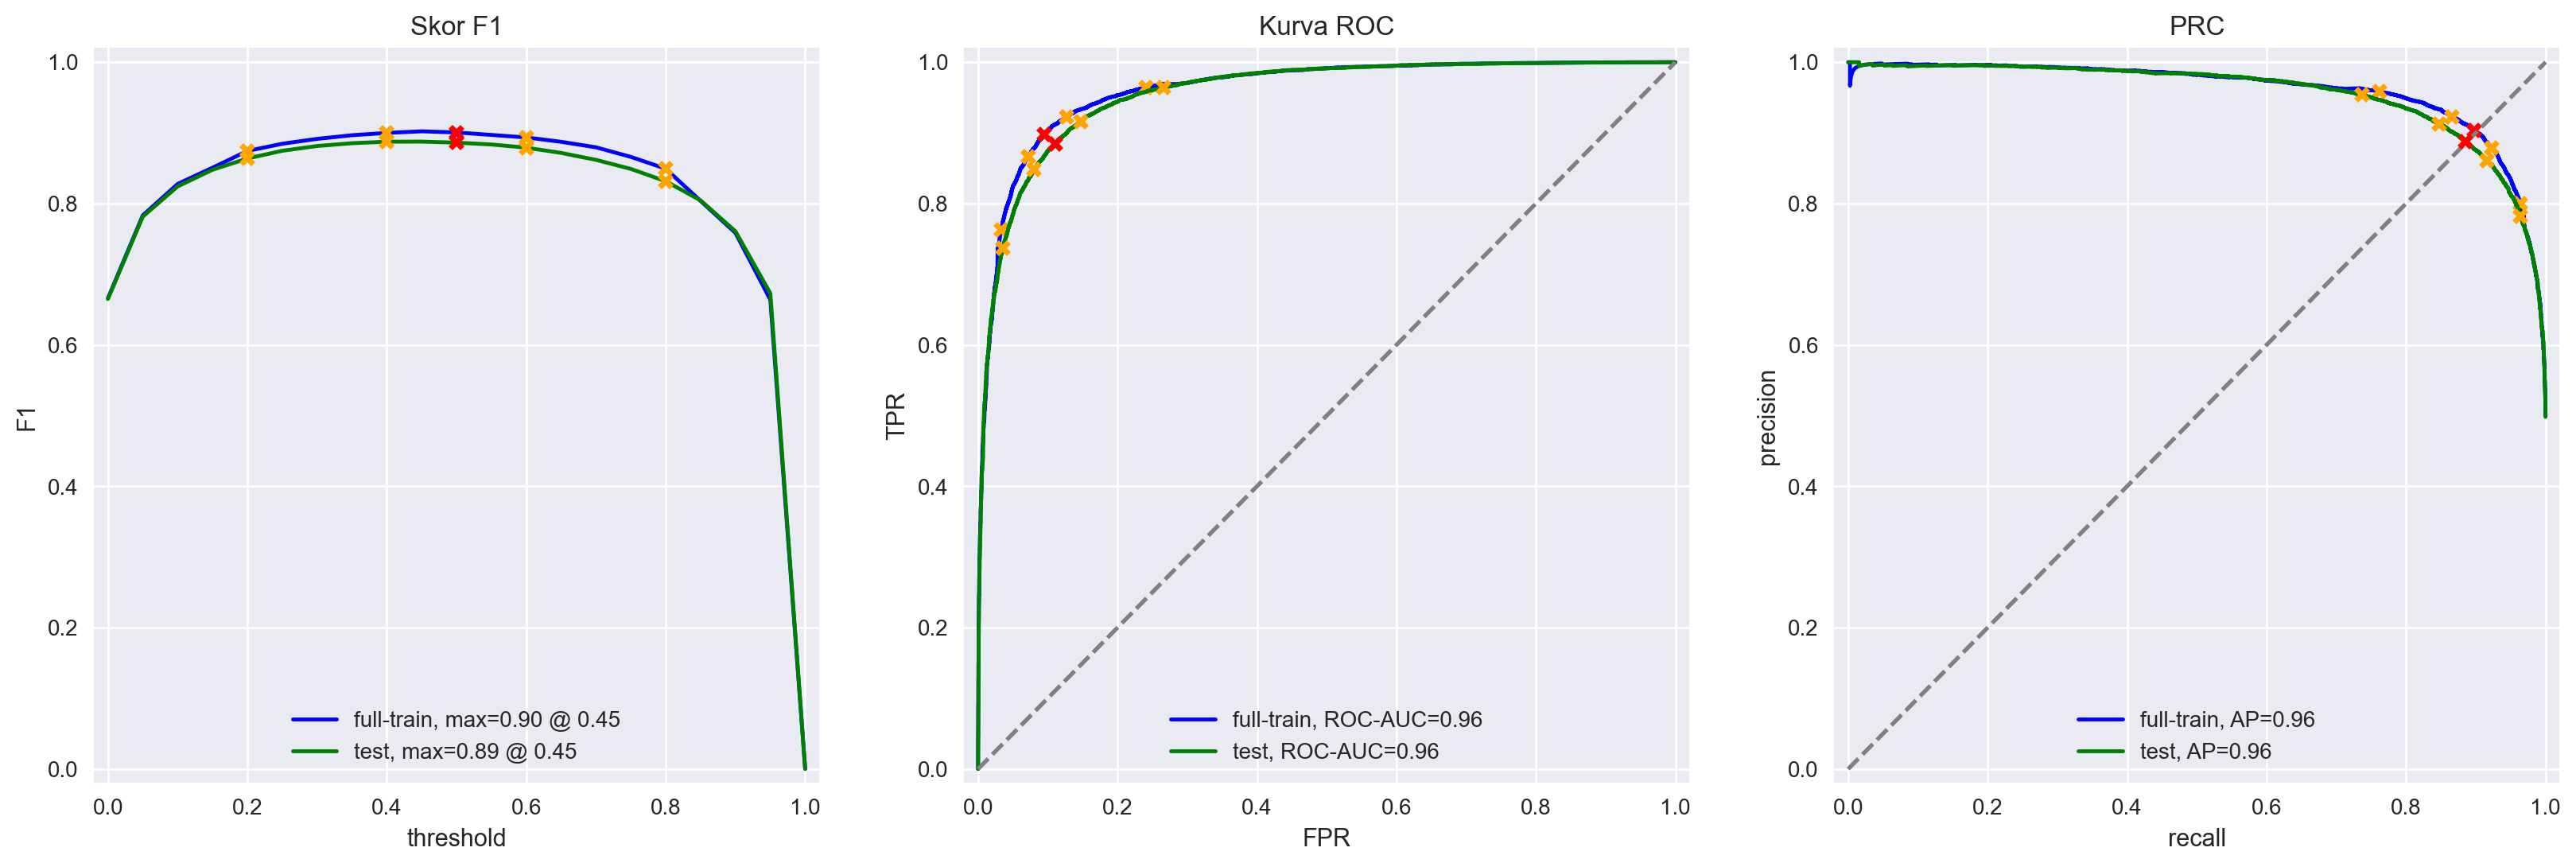

In [35]:
%%time
# melatih model pada dataset penuh
svm_best_model = SVC(C= 0.3, kernel= 'linear', probability=True)
svm_best_model.fit(x_train_vec, y_train)

# visualisasi sejumlah metrik
fig, ax = plt.subplots(ncols=3, figsize=(20, 6))
evaluate_model(svm_best_model, x_train_vec, y_train, ax=ax, color='blue', label='full-train')
evaluate_model(svm_best_model, x_test_vec, y_test, ax=ax, color='green', label='test')

<h4 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h4>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari hasil ini dapat terlihat bahwa model tidak mengalami *overfitting* karena gap kurva yang sangat kecil.
* Nilai *threshold* terbaik agar memperoleh *F1-score* maksimum (0,89) yaitu 0,40 berdasarkan prediksi model pada *testing set*.
* Nilai skor ROC-AUC sangat baik, mendekati nilai 1 yaitu sebesar 0,96 berdasarkan prediksi model pada *testing set*.
* Nilai skor *average-precision* (AP) sangat baik, mendekati nilai 1 yaitu sebesar 0,96 berdasarkan prediksi model pada *testing set*.
* Penurunan nilai *threshold* akan mengakibatkan nilai TPR dan FPR meningkat. Peningkatan nilai TPR dan FPR akan bervariasi sebab kurva ROC memiliki bentuk eksponensial. Nilai *threshold* terbaik berdasarkan kurva ROC yaitu 0,5 karena pada posisi tersebut laju peningkatan TPR dan FPR hampir sebanding karena berada pada titik belok.
* Penurunan nilai *threshold* akan mengakibatkan nilai *precision* menurun dan *recall* meningkat. Nilai *threshold* terbaik berdasarkan kurva PR yaitu 0,5 karena pada posisi tersebut laju perubahan *precision* dan *recall* sebanding karena berada pada titik belok.

</div>

### **XGBoost Model (XGBM)**

Pada bagian ini, kita akan melakukan *hyperparameter tuning* untuk mencari konfigurasi model terbaik. Fungsi objektif dari model terbaik yang digunakan yaitu model yang dapat memberikan nilai *F1-score* tertinggi saat memprediksi *validation set* selama proses *cross validation* pada **GridSearchCV**.

In [36]:
%%time
# hyperparameter tuning
xgb_model = XGBClassifier(n_jobs=-1, random_state=101010)
xgb_grid_parameter = {'reg_lambda':[40, 50, 60], 'reg_alpha':[5, 10, 15], 'learning_rate':[0.2, 0.3, 0.4]}
gs_xgb = GridSearchCV(xgb_model, xgb_grid_parameter, scoring='f1', cv=3, n_jobs=-1)
gs_xgb.fit(x_train_vec, y_train)

# best model result
result = cross_validation(gs_xgb.best_estimator_, x_train_vec, y_train, 3)

print(f"{' Threshold = 0.5 ':=^60}")
print(f"best_params_                  : {gs_xgb.best_params_}")
print(f"Avg.F1 score (cv_train/cv_val): {result['f1_train'].mean():.4f}/{result['f1_val'].mean():.4f}")
print(f"Avg.Accuracy (cv_train/cv_val): {result['acc_train'].mean():.4f}/{result['acc_val'].mean():.4f}")
result


===================== Threshold = 0.5 ======================
best_params_                  : {'learning_rate': 0.3, 'reg_alpha': 10, 'reg_lambda': 50}
Avg.F1 score (cv_train/cv_val): 0.9820/0.8621
Avg.Accuracy (cv_train/cv_val): 0.9820/0.8637
CPU times: total: 6min 36s
Wall time: 13min 2s


,fold,f1_train,acc_train,f1_val,acc_val
0,1,0.982303,0.982070,0.864127,0.868056
1,2,0.981504,0.981880,0.868135,0.865404
2,3,0.982068,0.982071,0.854113,0.857558


<h4 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h4>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Model terbaik diperoleh dengan konfigurasi hyperparameter {'learning_rate': 0.3, 'reg_alpha': 10, 'reg_lambda': 50}.
* Nilai *F1-score* rata-rata pada *training set* dan *validation set* adalah 0,98 dan 0,86 secara berturut-turut. Dari hasil ini dapat disimpulkan model mengalami *overfitting* karena gap nilai yang dihasilkan cukup besar. 
* Nilai akurasi rata-rata pada *training set* dan *validation set* adalah 0,98 dan 0,86 secara berturut-turut.
* Performa model sudah dapat memenuhi target proyek, yaitu *F1-score* sebesar 0,85.
* Berdasarkan hasil *F1 score* menunjukkan kualitas model *gradient boosting classifier* sedikit lebih buruk dari pada model *logistic regression* dan SVM.


</div>

Pada bagian berikutnya, kita akan melatih model pada dataset penuh dan melakukan visualisasi untuk sejumlah metrik. Dari visualisasi ini diharapkan dapat memberi informasi mengenai nilai *threshold* terbaik yang dapat digunakan untuk klasifikasi biner.

CPU times: total: 1min 57s
Wall time: 20 s


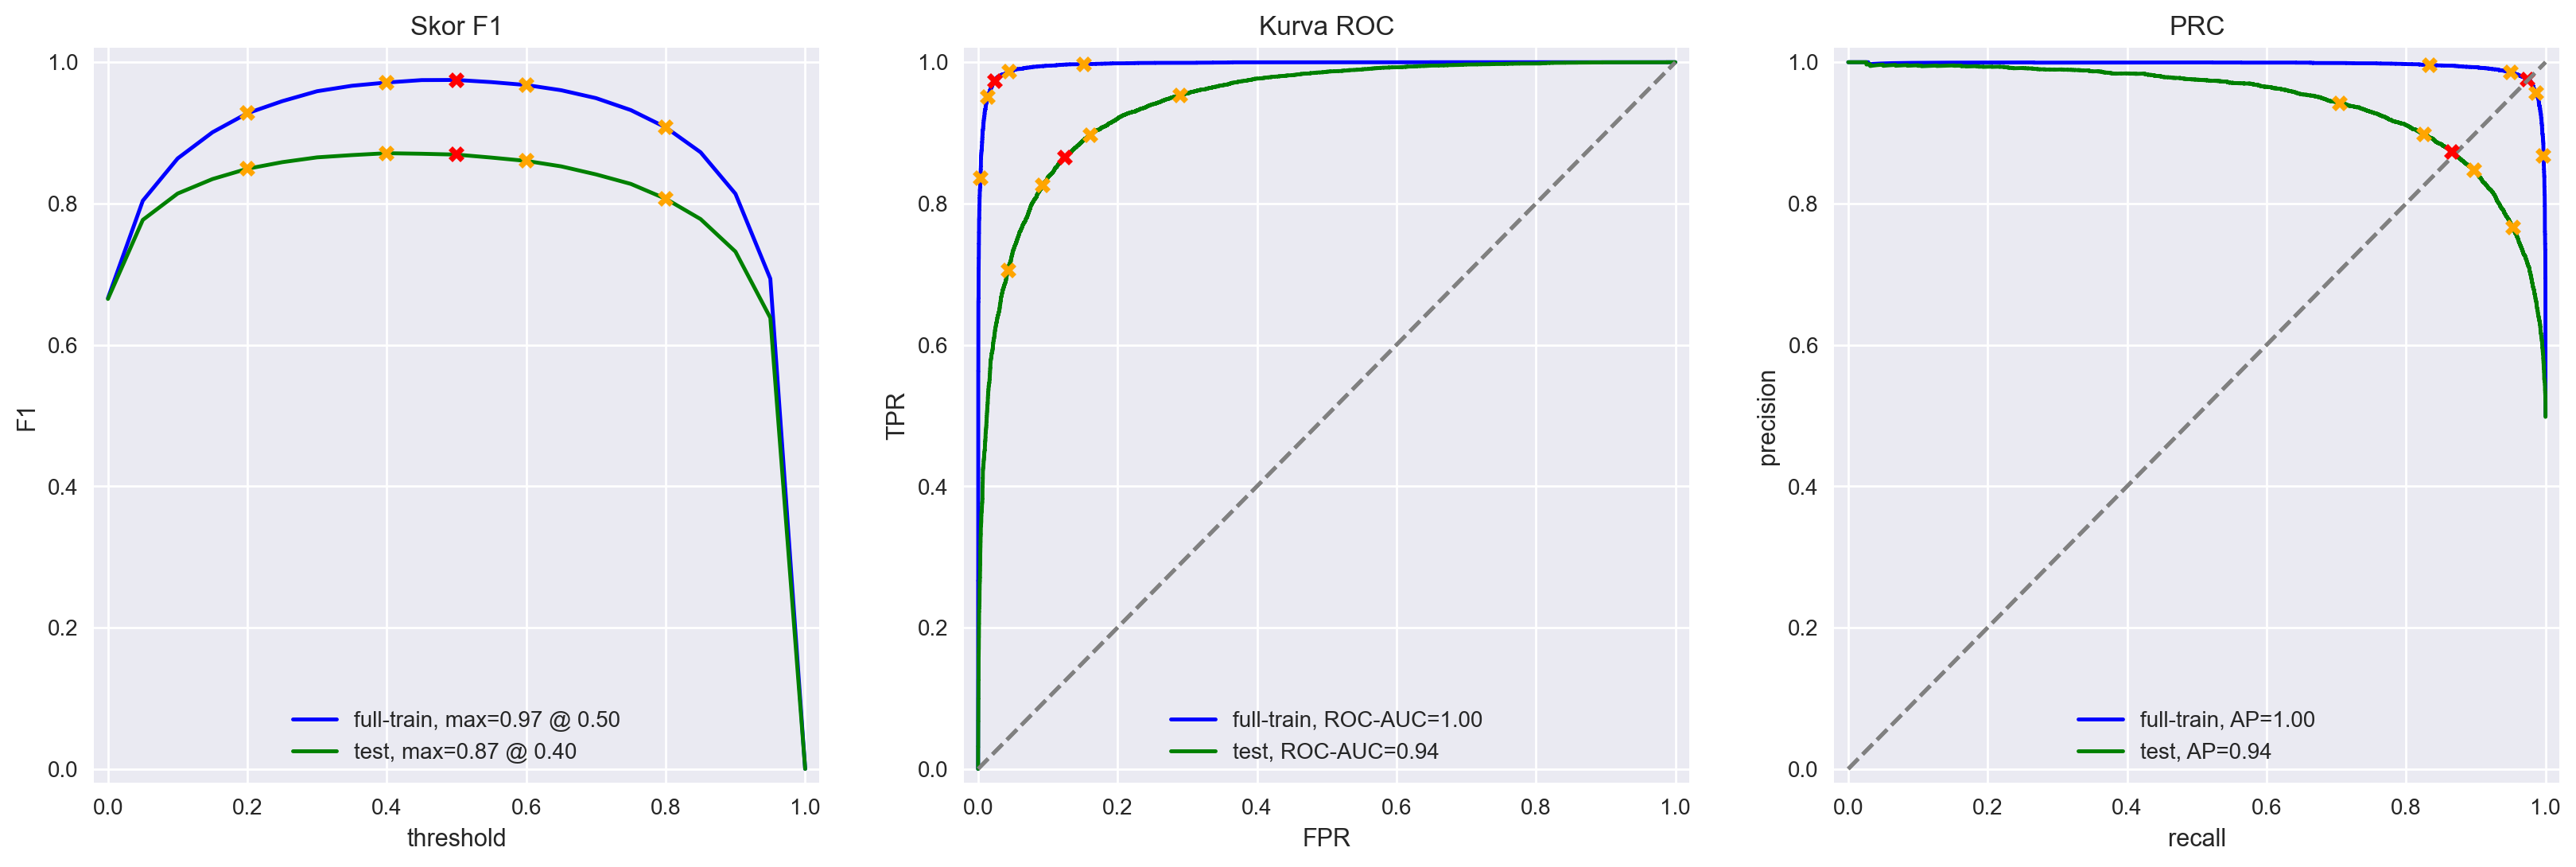

In [37]:
%%time
# melatih model pada dataset penuh
xgb_best_model = XGBClassifier(n_jobs=-1, random_state=101010, learning_rate= 0.3, reg_alpha= 10, reg_lambda= 50)
xgb_best_model.fit(x_train_vec, y_train)

# visualisasi sejumlah metrik
fig, ax = plt.subplots(ncols=3, figsize=(20, 6))
evaluate_model(xgb_best_model, x_train_vec, y_train, ax=ax, color='blue', label='full-train')
evaluate_model(xgb_best_model, x_test_vec, y_test, ax=ax, color='green', label='test')

<h4 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h4>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari hasil ini dapat terlihat bahwa model mengalami *overfitting* karena gap kurva yang cukup besar. Pada kurva ROC dan PR **full-train** terlihat dengan jelas bahwa kurva memiliki bentuk yang hampir sempurna, dimana kurva berada pada sudut kiri atas (kurva ROC) dan kurva berada pada sudut kanan atas (kurva PR).
* Nilai *threshold* terbaik agar memperoleh *F1-score* maksimum (0,87) yaitu 0,40 berdasarkan prediksi model pada *testing set*.
* Nilai skor ROC-AUC sangat baik, mendekati nilai 1 yaitu sebesar 0,94 berdasarkan prediksi model pada *testing set*.
* Nilai skor *average-precision* (AP) sangat baik, mendekati nilai 1 yaitu sebesar 0,94 berdasarkan prediksi model pada *testing set*.
* Penurunan nilai *threshold* akan mengakibatkan nilai TPR dan FPR meningkat. Peningkatan nilai TPR dan FPR akan bervariasi sebab kurva ROC memiliki bentuk eksponensial. Nilai *threshold* terbaik berdasarkan kurva ROC yaitu 0,5 karena pada posisi tersebut laju peningkatan TPR dan FPR hampir sebanding karena berada pada titik belok.
* Penurunan nilai *threshold* akan mengakibatkan nilai *precision* menurun dan *recall* meningkat. Nilai *threshold* terbaik berdasarkan kurva PR yaitu 0,5 karena pada posisi tersebut laju perubahan *precision* dan *recall* sebanding karena berada pada titik belok.

</div>

### **K-Nearest Neighbors (KNN)**

Pada bagian ini, kita akan melakukan *hyperparameter tuning* untuk mencari konfigurasi model terbaik. Fungsi objektif dari model terbaik yang digunakan yaitu model yang dapat memberikan nilai *F1-score* tertinggi saat memprediksi *validation set* selama proses *cross validation* pada **GridSearchCV**.

In [38]:
%%time
# hyperparameter tuning
knn_model = KNeighborsClassifier(n_jobs=-1)
knn_grid_parameter = {'n_neighbors':[15, 20, 25], 'weights':['uniform', 'distance'], 'metric':['euclidean', 'manhattan']}
gs_knn = GridSearchCV(knn_model, knn_grid_parameter, scoring='f1', cv=3, n_jobs=-1)
gs_knn.fit(x_train_vec, y_train)

# best model result
result = cross_validation(gs_knn.best_estimator_, x_train_vec, y_train, 3)

print(f"{' Threshold = 0.5 ':=^60}")
print(f"best_params_                  : {gs_knn.best_params_}")
print(f"Avg.F1 score (cv_train/cv_val): {result['f1_train'].mean():.4f}/{result['f1_val'].mean():.4f}")
print(f"Avg.Accuracy (cv_train/cv_val): {result['acc_train'].mean():.4f}/{result['acc_val'].mean():.4f}")
result


===================== Threshold = 0.5 ======================
best_params_                  : {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'distance'}
Avg.F1 score (cv_train/cv_val): 1.0000/0.7838
Avg.Accuracy (cv_train/cv_val): 1.0000/0.8077
CPU times: total: 1min 20s
Wall time: 5min 22s


,fold,f1_train,acc_train,f1_val,acc_val
0,1,1.0,1.0,0.792621,0.818308
1,2,1.0,1.0,0.779232,0.799747
2,3,1.0,1.0,0.779429,0.805026


<h4 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h4>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Model terbaik diperoleh dengan konfigurasi hyperparameter {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'distance'}.
* Nilai *F1-score* rata-rata pada *training set* dan *validation set* adalah 1,00 dan 0,78 secara berturut-turut. Dari hasil ini dapat disimpulkan model mengalami *overfitting* karena gap nilai yang dihasilkan cukup besar.
* Nilai akurasi rata-rata pada *training set* dan *validation set* adalah 1,00 dan 0,81 secara berturut-turut.
* Performa model belum dapat memenuhi target proyek, yaitu *F1-score* sebesar 0,85.
* Berdasarkan hasil *F1 score* menunjukkan kualitas model KNN merupakan model terburuk dibandingkan model *gradient boosting classifier*, *logistic regression* dan SVM.

</div>

Pada bagian berikutnya, kita akan melatih model pada dataset penuh dan melakukan visualisasi untuk sejumlah metrik. Dari visualisasi ini diharapkan dapat memberi informasi mengenai nilai *threshold* terbaik yang dapat digunakan untuk klasifikasi biner.

CPU times: total: 1min 20s
Wall time: 13.9 s


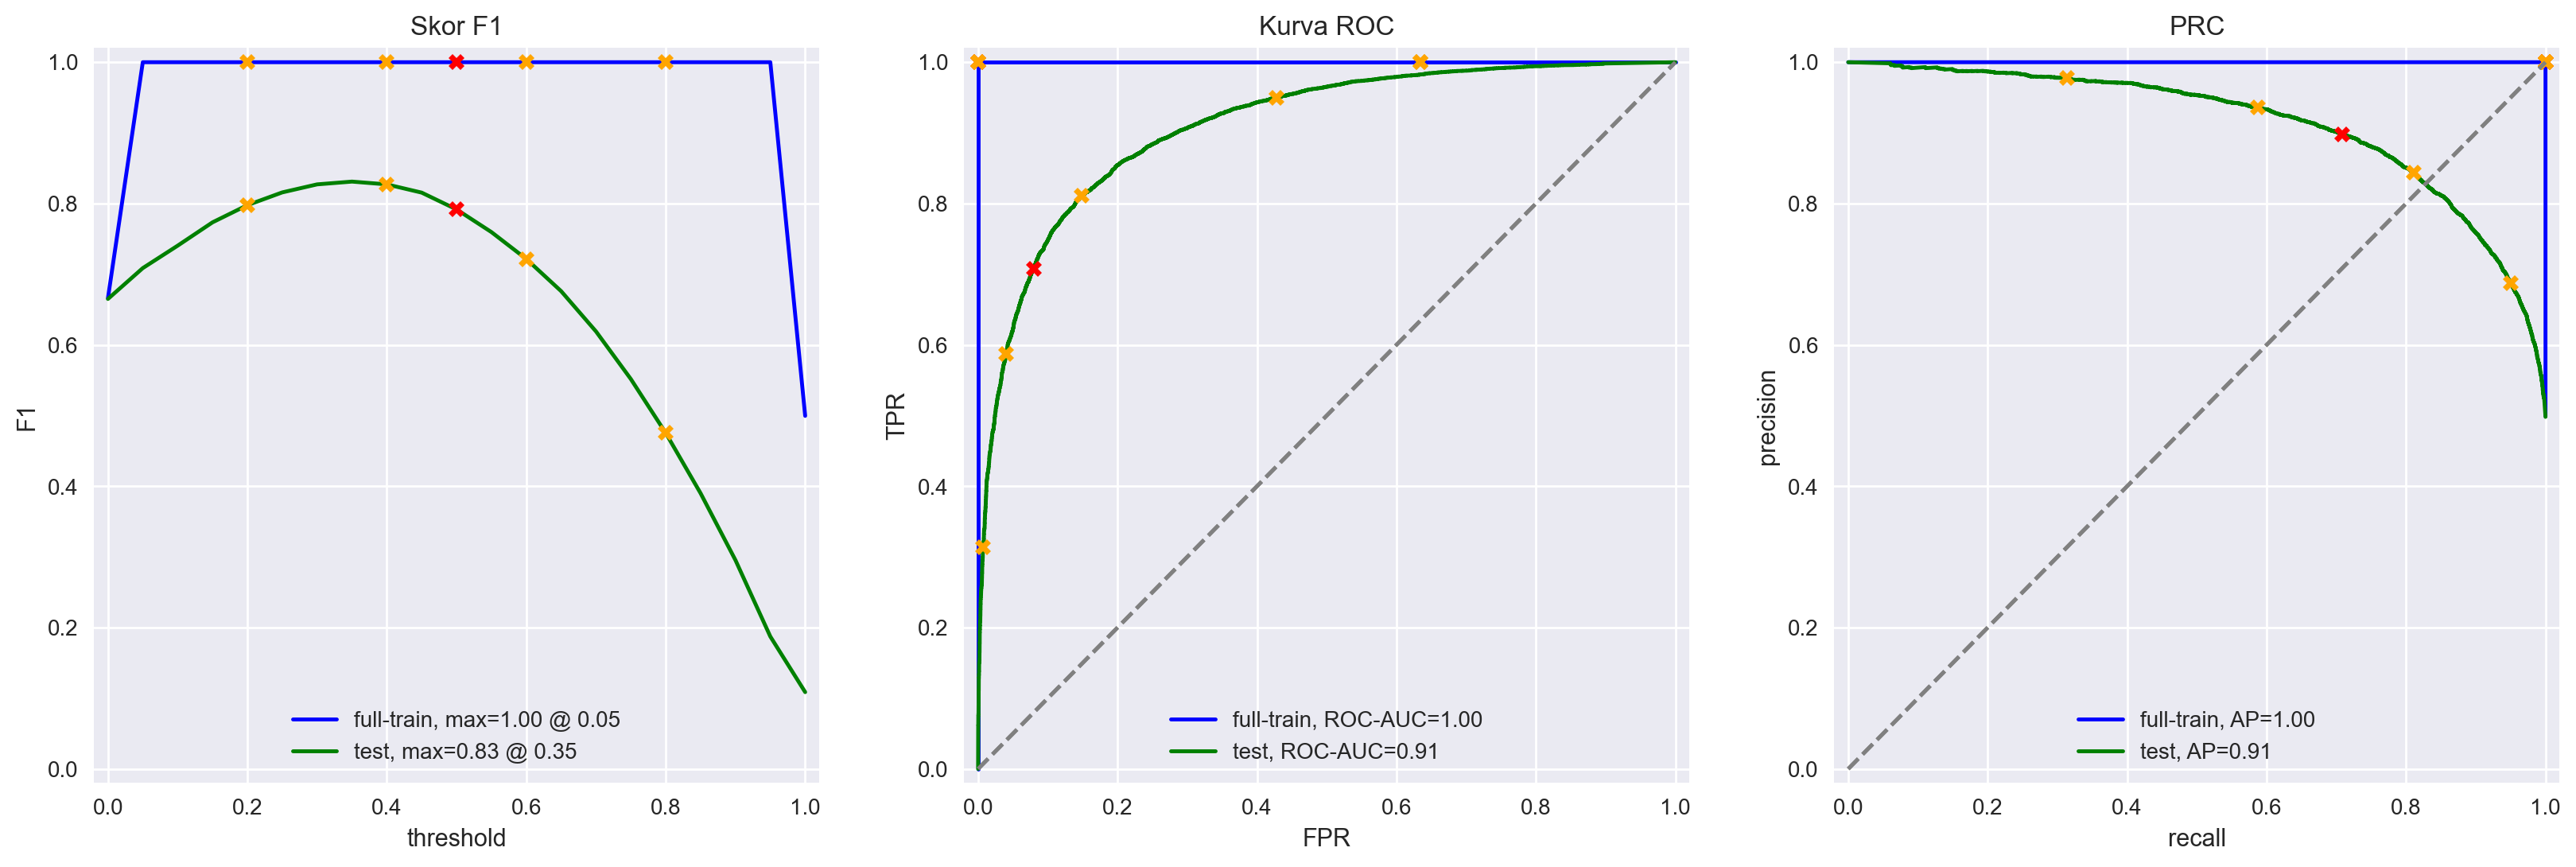

In [39]:
%%time
# melatih model pada dataset penuh
knn_best_model = KNeighborsClassifier(n_jobs=-1, metric='euclidean', n_neighbors=20, weights='distance')
knn_best_model.fit(x_train_vec, y_train)

# visualisasi sejumlah metrik
fig, ax = plt.subplots(ncols=3, figsize=(20, 6))
evaluate_model(knn_best_model, x_train_vec, y_train, ax=ax, color='blue', label='full-train')
evaluate_model(knn_best_model, x_test_vec, y_test, ax=ax, color='green', label='test')

<h4 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h4>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari hasil ini dapat terlihat bahwa model mengalami *overfitting* karena gap kurva yang cukup besar. Pada kurva ROC dan PR **full-train** terlihat dengan jelas bahwa kurva memiliki bentuk yang sempurna, dimana kurva berada pada sudut kiri atas (kurva ROC) dan kurva berada pada sudut kanan atas (kurva PR).
* Nilai *threshold* terbaik agar memperoleh *F1-score* maksimum (0,83) yaitu 0,35 berdasarkan prediksi model pada *testing set*.
* Nilai skor ROC-AUC sangat baik, mendekati nilai 1 yaitu sebesar 0,91 berdasarkan prediksi model pada *testing set*.
* Nilai skor *average-precision* (AP) sangat baik, mendekati nilai 1 yaitu sebesar 0,91 berdasarkan prediksi model pada *testing set*.
* Penurunan nilai *threshold* akan mengakibatkan nilai TPR dan FPR meningkat. Peningkatan nilai TPR dan FPR akan bervariasi sebab kurva ROC memiliki bentuk eksponensial. Nilai *threshold* terbaik berdasarkan kurva ROC yaitu 0,4 karena pada posisi tersebut laju peningkatan TPR dan FPR hampir sebanding karena berada pada titik belok.
* Penurunan nilai *threshold* akan mengakibatkan nilai *precision* menurun dan *recall* meningkat. Nilai *threshold* terbaik berdasarkan kurva PR yaitu 0,4 karena pada posisi tersebut laju perubahan *precision* dan *recall* sebanding karena berada pada titik belok.


</div>

## 4) Evaluasi Model

### **Membandingkan Kualitas Antar Model Melalui Visualisasi**

Berikut di bawah ini merupakan visualisasi untuk sejumlah metrik, untuk masing-masing model terbaik ketika memprediksi *testing dataset*.

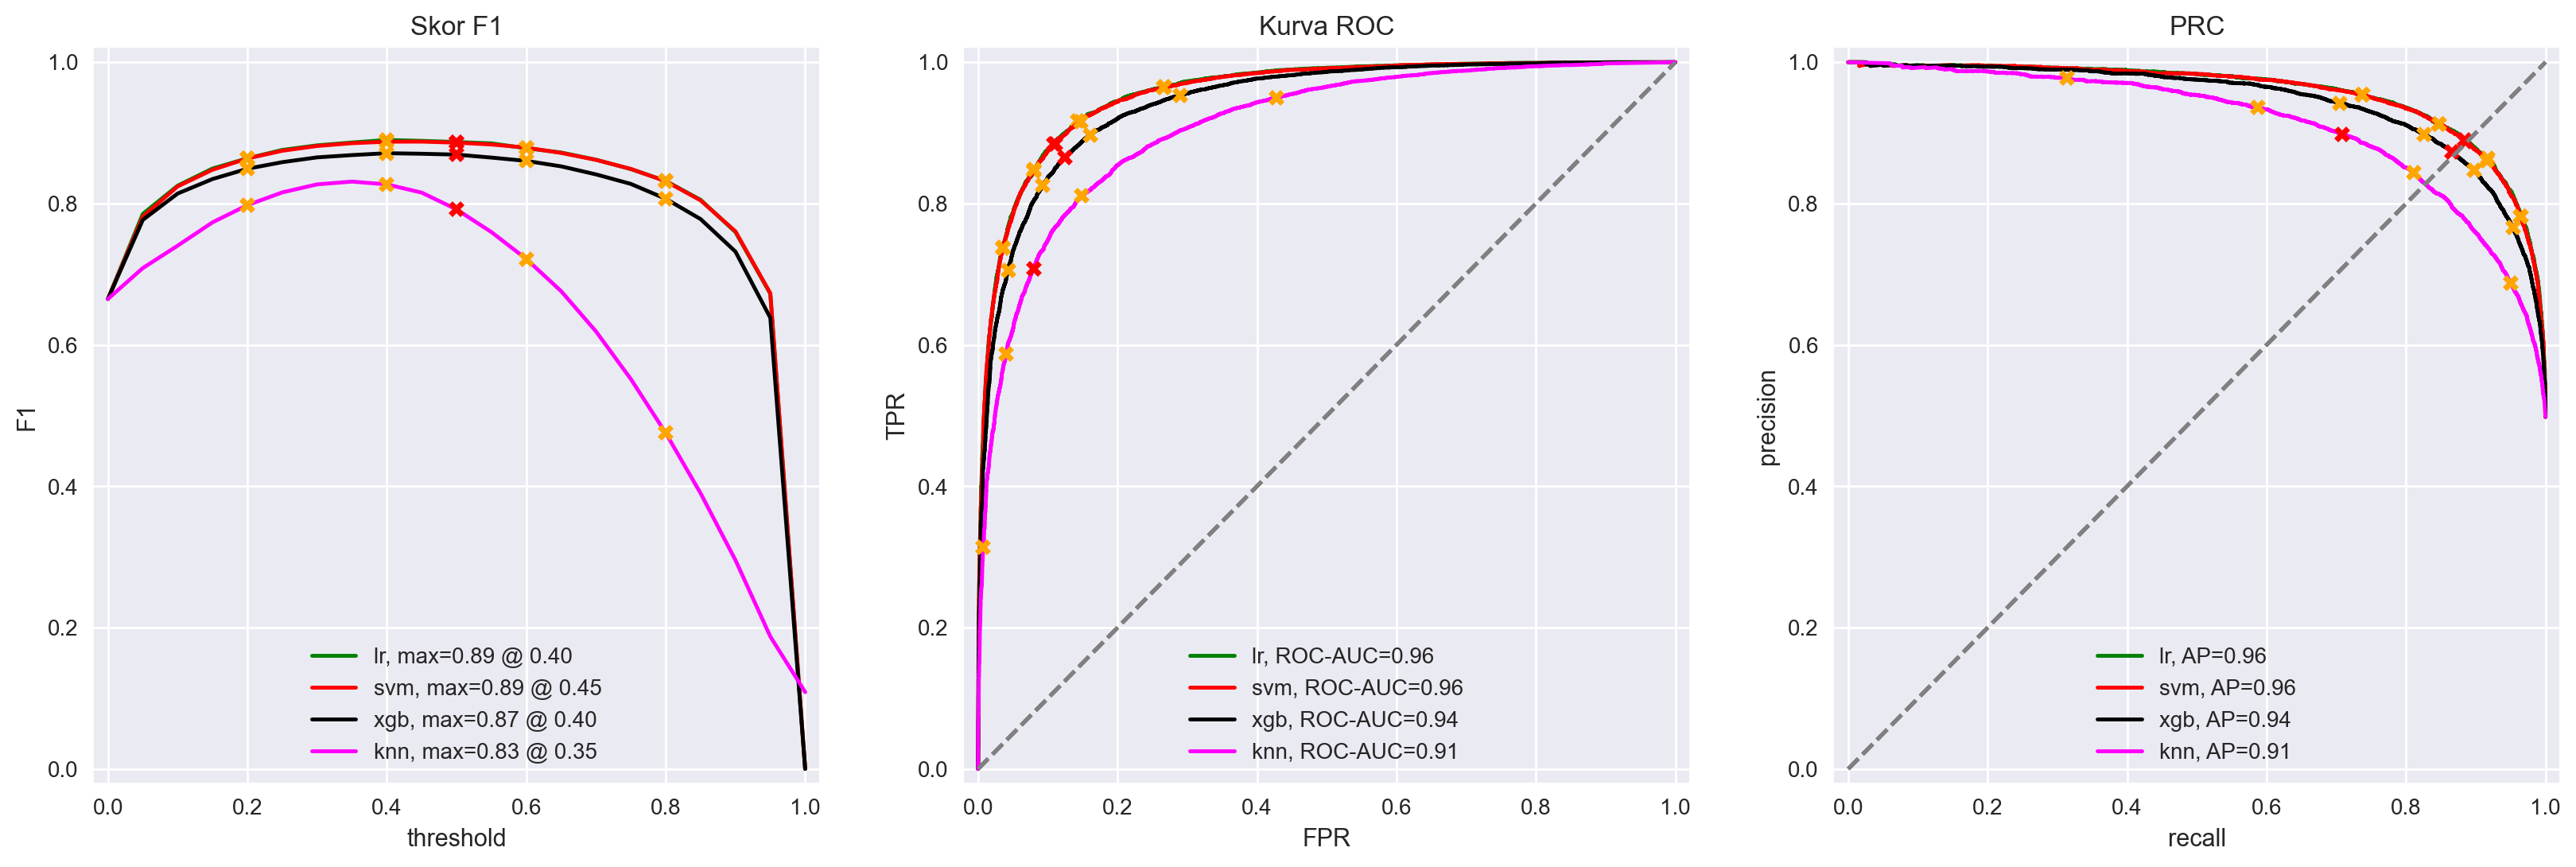

In [134]:
# visualisasi sejumlah metrik untuk seluruh model terbaik
fig, ax = plt.subplots(ncols=3, figsize=(20, 6))

evaluate_model(lr_model, x_test_vec, y_test, ax=ax, color='green', label='lr')
evaluate_model(svm_best_model, x_test_vec, y_test, ax=ax, color='red', label='svm')
evaluate_model(xgb_best_model, x_test_vec, y_test, ax=ax, color='black', label='xgb')
evaluate_model(knn_best_model, x_test_vec, y_test, ax=ax, color='magenta', label='knn')

<h4 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h4>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Model dengan skor F1 tertinggi dimiliki oleh model *logistic regression* dan SVM, dengan skor F1 sebesar 0,89 untuk keduanya. Untuk model *logistic regression*, F1 maksimum dapat diperoleh menggunakan *threshold* 0,40. Adapun untuk model SVM, F1 maksimum dapat diperoleh menggunakan *threshold* 0,45.
* Pada urutan ketiga, terdapat model *gradient boosting* dengan skor F1 sebesar 0,87 pada *threshold* 0,40.
* Pada urutan keempat, terdapat model *K-Nearest Neighbour* dengan skor F1 sebesar 0,83 pada *threshold* 0,35.

</div>

### **Membandingkan Kualitas Antar Model Melalui Input Ulasan**

Pada bagian ini, kita akan menguji performa masing-masing model terbaik (termasuk nilai *threshold* terbaik) untuk mengklasifikasikan 10 teks yang diberikan.

In [164]:
# data teks yang akan diklasifikasikan
data_texts = pd.DataFrame({
    'review':[
        "The cinematography in this film is absolutely stunning! Every frame feels like a work of art. Definitely a must-watch for any film lover.",
        "I found the plot to be quite predictable and the characters lacking depth. Overall, a disappointing experience.",
        "The performances by the lead actors were phenomenal, especially considering the emotional depth of the story. A truly gripping film that will stay with you long after it ends.",
        "I couldn't connect with any of the characters, and the pacing felt off. It's a shame because the concept had so much potential.",
        "A masterpiece of storytelling! The way the narrative unfolds keeps you on the edge of your seat until the very end. Highly recommend it!",
        "The special effects were impressive, but they couldn't make up for the lackluster script and wooden acting. Overall, a forgettable experience.",
        "I laughed, I cried, I was thoroughly entertained from start to finish. This film has it all - humor, heart, and a powerful message. Two thumbs up!",
        "The dialogue felt forced, and the plot twists were too convenient. I expected more from a film with such a talented cast.",
        "Visually stunning with a soundtrack that enhances every scene. Even if you're not a fan of the genre, this film is worth watching for its technical brilliance alone.",
        "I was left feeling underwhelmed by the lack of character development and the clichéd storyline. It's a shame because the production value was clearly high."
    ],
    'pos':[1,0,1,0,1,0,1,0,1,0]
    })

# melakukan tokenizing dan embedding
ids_, attmask_ = tokenize_with_bert(data_texts['review'].values)
vec_ = embedding_with_bert(ids_, attmask_)

# melakukan prediksi menggunakan best model
lr_thr = 0.40
svm_thr = 0.45
xgb_thr = 0.40
knn_thr = 0.35
data_texts['lr_pred'] = np.where(lr_model.predict_proba(vec_)[:,1]>=lr_thr, 1, 0)
data_texts['svm_pred'] = np.where(svm_best_model.predict_proba(vec_)[:,1]>=svm_thr, 1, 0)
data_texts['xgb_pred'] = np.where(xgb_best_model.predict_proba(vec_)[:,1]>=xgb_thr, 1, 0)
data_texts['knn_pred'] = np.where(knn_best_model.predict_proba(vec_)[:,1]>=knn_thr, 1, 0)

# nilai akurasi
print(f"\n{' Skor Akurasi ':=^50}")
print(f"Logistic regression    : {accuracy_score(data_texts['pos'], data_texts['lr_pred']):.2%}")
print(f"Support vector machine : {accuracy_score(data_texts['pos'], data_texts['svm_pred']):.2%}")
print(f"Gradient boosting      : {accuracy_score(data_texts['pos'], data_texts['xgb_pred']):.2%}")
print(f"K-nearest neighbour    : {accuracy_score(data_texts['pos'], data_texts['knn_pred']):.2%}")

data_texts

Panjang token minimum: 22
Panjang token maksimum: 36


100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


================== Skor Akurasi ==================
Logistic regression    : 100.00%
Support vector machine : 100.00%
Gradient boosting      : 100.00%
K-nearest neighbour    : 70.00%


,review,pos,lr_pred,svm_pred,xgb_pred,knn_pred
0,The cinematography in this film is absolutely ...,1,1,1,1,1
1,I found the plot to be quite predictable and t...,0,0,0,0,1
2,The performances by the lead actors were pheno...,1,1,1,1,1
3,"I couldn't connect with any of the characters,...",0,0,0,0,0
4,A masterpiece of storytelling! The way the nar...,1,1,1,1,1
5,"The special effects were impressive, but they ...",0,0,0,0,1
6,"I laughed, I cried, I was thoroughly entertain...",1,1,1,1,1
7,"The dialogue felt forced, and the plot twists ...",0,0,0,0,1
8,Visually stunning with a soundtrack that enhan...,1,1,1,1,1
9,I was left feeling underwhelmed by the lack of...,0,0,0,0,0


<h4 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h4>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari hasil pengujian diatas, 3 model memprediksi secara sempurna sedangkan 1 model lainnya hanya berhasil memprediksi sebanyak 7 ulasan. Model yang hanya memprediksi 7 ulasan tersebut, yakni model KNN.
* Model KNN cenderung memprediksi suatu ulasan sebagai ulasan positif, sehingga melakukan banyak prediksi *False Positive*.

</div>

# **G. Kesimpulan**

<h3 style="font-weight:bold; font-family:Trebuchet MS">Hasil Analisa Data</h3>
<div style="margin-left:2%; width:95%; text-align:justify">

* Fase puncak industri film dalam rentang tahun 1894-2010 terjadi pada tahun 2005-2006.
* Jumlah *review* untuk sebuah film memiliki tren positif. Hal ini menunjukkan antusias penikmat film yang semakin meningkat setiap tahun.
* Film-film yang dirilis pasca tahun 2000 mengalami peningkatan proporsi ulasan negatif dibandingkan masa sebelumnya.
* Kata `'film'`, `'movie'`, `'character'`, `'story'` dan `'scene'` merupakan unsur kata yang dapat ditemukan pada hampir seluruh ulasan, baik ulasan positif maupun negatif. Hal ini menunjukkan bahwa kata-kata tersebut menjadi poin utama pada ulasan penikmat film.
* Ulasan negatif dapat memiliki unsur kata `'bad'` maupun `'good'`, sedangkan ulasan positif mayoritas memiliki unsur kata `'good'`. Hal ini menunjukkan bahwa sebuah ulasan negatif tetap menunjukkan penilaian positif meski lebih menyorot pada sisi negatif.
* *Rating* bernilai 5 dan 6 memiliki frekuensi paling minimum. Adapun *rating* film bernilai 1 dan 10 memiliki frekuensi maksimum. Hal ini menunjukkan bahwa penikmat film lebih cenderung menggunakan nilai yang ekstrim saat menilai sebuah film, alih-alih menggunakan nilai pertengahan seperti 5 dan 6.

</div>

<h3 style="font-weight:bold; font-family:Trebuchet MS">Hasil Membangun Model</h3>
<div style="margin-left:2%; width:95%; text-align:justify">

* Dari pengujian 4 buah model, yakni **Logistic Regression**, **Support Vector Machine (SVM)**, **Gradient Boosting**, dan **K-Nearest Neighbour**, berikut merupakan konfigurasi terbaik untuk masing-masing model:
    * **Logistic Regression**: {'threshold': 0.40}
    * **Support Vector Machine (SVM)**: {'C': 0.3, 'kernel': 'linear', 'threshold': 0.45}
    * **Gradient Boosting**: {'learning_rate': 0.3, 'reg_alpha': 10, 'reg_lambda': 50, 'threshold': 0.40}
    * **K-Nearest Neighbour**: {'metric': 'euclidean', 'n_neighbors': 20, 'weights': 'distance', 'threshold': 0.35}

* Berikut merupakan nilai *F1 score* masing-masing model ketika memprediksi *testing dataset*:
    * **Logistic Regression**: 0.89
    * **Support Vector Machine (SVM)**: 0.89
    * **Gradient Boosting**: 0.87
    * **K-Nearest Neighbour**: 0.83

* Dari 4 model yang diuji, hanya 3 model yang memenuhi standard minimum *F1 score* pada proyek ini, yaitu model **Logistic Regression**, **Support Vector Machine (SVM)**, dan **Gradient Boosting**.

* Model terbaik yang diperoleh pada proyek ini berdasarkan *F1 score* tertinggi dan proses *fitting* yang singkat, yaitu model **Logistic Regression**.


</div>